<h1 align='center'>Cyclistic Bike-Share Analysis</h1>
<h6 align='center'>By: Calvin King | Date: 03/22/2022</h6><br><br>
        
    
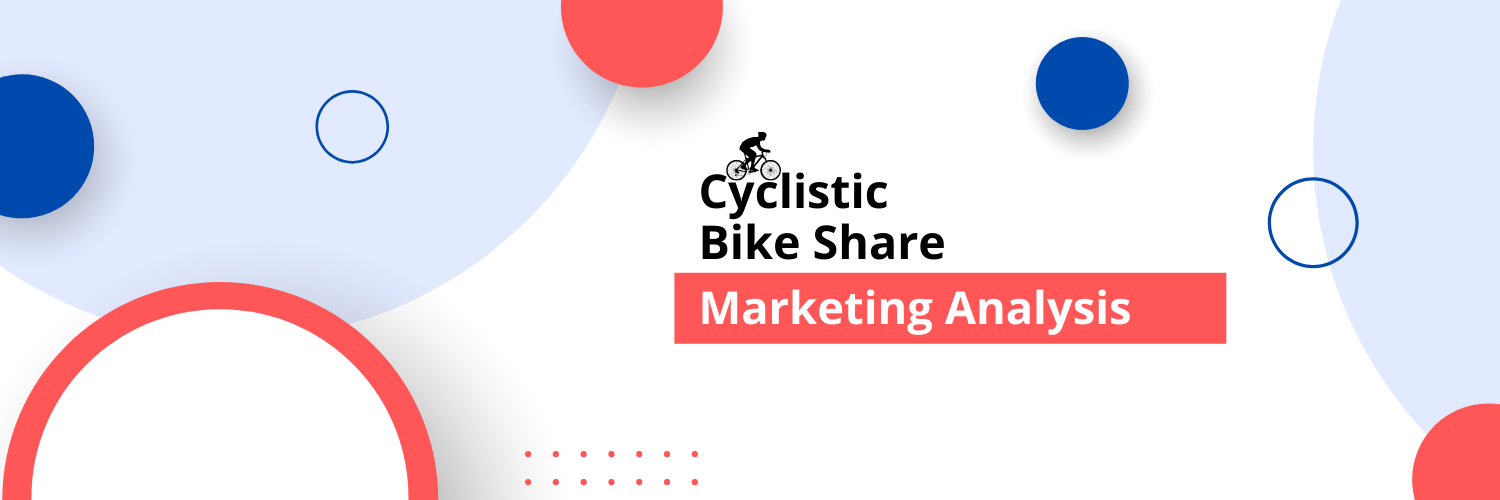


## Table of Contents
    
[1. Project Background](#p1)<br>
[2. Project Preparation](#p2)<br>
[3. Data Processing](#p3)<br>
[4. Data Analysis](#p4)<br>
[5. Findings](#p5)<br>
[6. Conclusion, Recommendations, and Further Exploration](#p6)<br>

<hr>

<h2><ins> 1. Project Background </ins></h2>

Lily Moreno, the director of marketing for Cyclistic Bike-Share, believes that the company’s future success depends on maximizing the number of annual memberships.Cyclistic’s financial analytics team have concluded that annual memberships are much more profitable than casual riders.

For reference: 

<b><ins>Members</ins></b>: Riders that hold an annual subscription plan<br> 
<b><ins>Casuals</ins></b> Riders that purchases single passes (daily-ride or single-ride) 

### 1.a Business Objective

Mrs. Moreno has a clear goal to design marketing strategies aimed at converting casual rides into annual members. She notes that casual riders are already familiar with the Cyclistic program.

### 1.b. Tasks and Deliverables

The primary business task is to maximize the number of annual memberships through casual rider conversion to annual memberships.

The analyst task is to understand how annual and casual riders use Cyclistic bikes differently.

Deliverables for this analysis include:

- A summary analysis 
- Supporting visualizations and key findings
- Three recommendations on how to increase conversion


### 1.c. Key Stakeholders

<ins><b>The Cyclistic Management Team</b></ins><br>Final decision-makers on all strategies recommended for the company. They are meticulously detailed-oriented.

<ins><b>Director of MarketingLily Moreno</b></ins><br> 
The future-oriented marketing executive responsible for overall direction of Cyclistic marketing efforts.

<ins><b>The Marketing Team</b></ins><br>Responsible for the research, analysis, recommendations, and monitoring of Cyclistics marketing efforts/results.

<hr>

<h2><ins>2. Project Preparation </ins></h2>

The data used in this analysis is made available by <b>Motivate International, Inc</b> (MII) under their [open license](https://ride.divvybikes.com/data-license-agreement). MII is the managing corporation for Chicago Department of Transportation’s bike sharing program, Cyclistic.

<h3>2.a. Data Location</h3>

The data used in this analysis is located at:

https://divvy-tripdata.s3.amazonaws.com/index.html

For the purposes of this project, I will only review data from January 2021 - December 2021.

<h3>2.b. Data Organization</h3>

- The source data is stored in a .csv format.
- Each .csv file represents a month of consumer data.
- A total of 13 files were extracted and each file contains 13 attributes (long format)
- Subsequent data files will follow the naming convention: YYYYMM-<Project_Name>-V<#>.csv

<h3> 2.c. Data Credibility</h3>

- The datasets contain anonymized rider data from the past 12 months.
- The datasets are cited by Motivate International Inc. and verifed by the Chicago DOT
- The datasets are first-party collected by Motivate International Inc.

<h3>2.d. Data Security, Licensing, Privacy, and Accessibility</h3>

- Copies of the original datasets are located in a password-protected data repository.
- Rider data has been anonymized/tokenized
- Access to PII such as credit cards, addresses, and full names are restricted and unavailable.
- Made available by Motivate International Inc.(the managing corporation for Chicago’s Cyclistic program) [HERE](https://ride.divvybikes.com/data-license-agreement).

<hr>

<h2><ins>3. Data Processing</ins></h2>

I will be using a top-down, left-to-right, iterative approach to process and clean the data. 

### 3.a. Analysis Tools

For this analysis I will be utilizing the Python language, Pandas library for data analysis, and the Jupyter notebook. 

My preliminary review of the data revealed that 5+ million data points are present. I've chosen Python as my primary analysis tool due to its ease of handling large volumnes of data points seamlessly. Additionally, I will be protyping visualizations and debugging on the fly which is where Python shines. 

### 3.b. Data Integrity

In this section I’ll check the data for validity, accuracy, completeness, and consistency.

Here I will check the column names for uniformity, then move on to view the dimensions, datatypes, and overall structure. 

First, I'll import the data:

In [1]:
#Import libraries for calculations and visualizations...
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl 
import seaborn as sns
from os import listdir

#Adjust mpl speed...
mpl.rcParams['agg.path.chunksize'] = 10000

#Combining the data files...
csv_frame = []
for file in listdir('C:\\Users\\Work\\Documents\\A_Jupyter_Projects\Projects\\A_Cyclistic_Analysis\\0.DataSets'):
    temp_frame = pd.read_csv(f'C:\\Users\\Work\\Documents\\A_Jupyter_Projects\\Projects\\A_Cyclistic_Analysis\\0.DataSets\\{file}')
    csv_frame.append(temp_frame)
cyclisticDF = pd.concat(csv_frame)

#Review the created data frame...
cyclisticDF.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


At this point I'd like to quickly check the column names for uniformity, get a sense of the volume of data, and observe some of the dimensions and overall structure before I move on to cleaning:  

In [2]:
#Checking column names for uniformity: 
cyclisticDF.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [3]:
#Check shape...
rows, cols = cyclisticDF.shape
print(f'Total Observations: {rows}\nTotal Attributes: {cols}')

Total Observations: 5698833
Total Attributes: 13


In [4]:
#Check datatype...
cyclisticDF.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

<ins>Findings</ins>:<br>

From processing, I've noticed a couple of issues that may need to be addressed during cleaning: 

- The  columns 'start_station_name/end_station_name' and their respective ids may not be necessary. 
    - This is due to the missing values in those columns. Will need to calculate missing values. 
- The 'latitude' and 'longitude' columns could assist with determing biking distances
    - I will check to see if they can be used in visualizing geolocations. 
- The coumns 'started_at' and 'ended_at' appear to be the only ones that are aggregate-capable. 
    - I will create additional columns by 'month', 'day', hour, and 'weekday' 
    - These columns could also be repurposed to calculate travel time by rider membership. 
- The 'ride_id' column is not unique and does not offer much in terms of usability. It will be dropped. 
- The datatypes will need to be addressed to allow for seamless calculations and plotting

### 3.c. Data Cleaning

In this section I want to begin finding and dealing with missing values, adjust formatting and typos, and drop unnecessary (or insignificant) columns from consideration. 

<b> 3.c.1. Checking for missing values </b>

In [5]:
#Count of missing values
cyclisticDF.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    707069
start_station_id      707066
end_station_name      757097
end_station_id        757097
start_lat                  0
start_lng                  0
end_lat                 4857
end_lng                 4857
member_casual              0
dtype: int64

In [25]:
#Finding the Missing percentages
for col in cyclisticDF.columns: 
    pct_missing = np.mean(cyclisticDF[col].isnull())
    print('{}-{}%'.format(col, round(pct_missing*100)))

ride_id-0%
rideable_type-0%
started_at-0%
ended_at-0%
start_station_name-12%
start_station_id-12%
end_station_name-13%
end_station_id-13%
start_lat-0%
start_lng-0%
end_lat-0%
end_lng-0%
member_casual-0%


The start/end station names/ids are missing a sizeable amount of data. While the names and id's may not impact our analysis too much, it will still be worth exploring those values to understand why they are empty. 

<b>3.c.2. Converting start/end times into datetime objects</b>

The current date-time format isn't really useful for performing calculations or analysis. I will have to convert those values into pandas datetime and create additional columns to hold the day, week, month, and year values to make time observations alot easier in the analysis phase. 

In [6]:
#Convert to DTime object...
cyclisticDF.started_at = pd.to_datetime(cyclisticDF.started_at)
cyclisticDF.ended_at = pd.to_datetime(cyclisticDF.ended_at)

<b>3.c.3. Creating day, month, hour, and weekday columns </b>

From here, I'll create the appropriate columns to hold parsed information from the 'started_at' and 'ended_at' columns. 

For the weekdays and months, I'll parse the numerical representations and convert them to their string versions (ie. 1 for 'Monday'). All other columns will use the parsed integers. 

In [7]:
#Year column
cyclisticDF['year'] = cyclisticDF.started_at.dt.year

#Days of year column
cyclisticDF['day365'] = cyclisticDF.started_at.dt.day_of_year

#Weekday column
cyclisticDF['weekday'] = cyclisticDF.started_at.dt.day_name()

#Month column
cyclisticDF['month'] = cyclisticDF.started_at.dt.month_name()

#Hour column
cyclisticDF['hour'] = cyclisticDF.started_at.dt.hour

In [8]:
#Checking results...
cyclisticDF.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'year', 'day365', 'weekday', 'month', 'hour'],
      dtype='object')

In [9]:
#Check to see if 'weekday' and 'month' names were parsed....
cyclisticDF.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,year,day365,weekday,month,hour
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,2021,23,Saturday,January,16
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,2021,27,Wednesday,January,18
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member,2021,21,Thursday,January,22
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member,2021,7,Thursday,January,13
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual,2021,23,Saturday,January,2


So far everything looks to be working as expected. Next I'll check for duplicates and make changes if needed. 

<b>3.c.4. Checking for and droping duplicates</b>

Running a quick search of the data to identify and return rows which have duplicates...

In [10]:
#Checking for duplicates...
cyclisticDF[cyclisticDF.duplicated(['ride_id'], keep=False)]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,year,day365,weekday,month,hour


No duplicates were returned, so the ride_id's must be unique. However, I see no logical reason to keep 'rider_id' within the dataframe, so it will be dropped before moving to the analysis phase. 

<b>3.c.5. Creating 'bike_time' and 'biking_distance' columns</b>

Next, I'll create a column which takes the total time a rider spends on a Cyclistic bike by calculating the time difference between the 'end_at' and 'start_at' columns. 

After that, I'll attempt to use the latitude and longitude data to calculate the distance traveled by each rider. Online research suggests the use of the <b>Haversine</b> formula to achieve this. I will reference [kanoki.org](https://www.movable-type.co.uk/scripts/latlong.html) for the proper function creation and calcuations: 

In [11]:
#creating bike_time column...
cyclisticDF['bike_time'] = (cyclisticDF['ended_at'] - cyclisticDF['started_at'])/pd.Timedelta(minutes=1)
cyclisticDF['bike_time'] = cyclisticDF['bike_time'].astype('int32')

In [12]:
#Define haversine function to calculate distance by lat and log coords...
def hVect(lon1, lat1, lon2, lat2):
    lon1,lat1,lon2,lat2 = map(np.radians, [lon1,lat1,lon2,lat2])
    newlon = lon2 - lon1
    newlat = lat2 - lat1
    hFml = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2
    dist = 2 * np.arcsin(np.sqrt(hFml))
    km = 6367 * dist
    return km

#Create new dataframe with distance info...
odPair = pd.DataFrame({
    'start_location': cyclisticDF.start_station_name,
    'start_lat': cyclisticDF.start_lat, 
    'start_long': cyclisticDF.start_lng,
    'end_lat': cyclisticDF.end_lat,
    'end_long': cyclisticDF.end_lng,
    'end_location': cyclisticDF.end_station_name
})

#Checking results...
odPair.tail(5)

,start_location,start_lat,start_long,end_lat,end_long,end_location
103765,Clinton St & Washington Blvd,41.883436,-87.641391,41.890000,-87.620000,NaN
103766,Racine Ave & Randolph St,41.884158,-87.656977,41.880000,-87.650000,NaN
103767,Broadway & Waveland Ave,41.949066,-87.648611,41.950780,-87.659172,Clark St & Grace St
103768,Racine Ave & Randolph St,41.884005,-87.657031,41.880000,-87.660000,NaN
103769,Clinton St & Washington Blvd,41.883248,-87.641244,41.888716,-87.644448,Desplaines St & Kinzie St


In [13]:
#Creating biking_distance column.
cyclisticDF['bike_distance'] = hVect(odPair.start_long, odPair.start_lat, odPair.end_long, odPair.end_lat)

In [14]:
#Checking to see if 'bike_time' and bike_distance' 
#columns were created successfully...
cyclisticDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698833 entries, 0 to 103769
Data columns (total 20 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  year                int64         
 14  day365              int64         
 15  weekday             object        
 16  month               object        
 17  hour                int64         
 18  bike_time           int32         
 19  bike_distance       float64       
dtypes: 

Both the 'bike_time' and 'bike_distance' columns were created successfully. 

With that, we will no longer need the start/end times or geocoordinates (lat,long) so those values will not be included in our later analysis. 

However, they may be useful in the future, so I will create a new data frame which doesn't include them, but preserves them in the original one.  

<b>3.c.6. Dropping Columns </b>

- Earlier I decided to drop the ride_id column because it offers no additional insight. 
- I will also drop the 'start/end station ids' because they're full of null values 
- The 'started_at/ended_at' columns will be dropped because I aggregated the data in 'bike_time' columns.
- The 'start/end lat/lng' columns will also be dropped since I've aggregated the data in the 'bike_distance' column. 

Since this will be a drastic change to the data structure, I will create a new data frame based on the old one and simply leave out the columns listed above.

In [15]:
#Copying DF and dropping station names, ids, and rider id
v2_cycDF = cyclisticDF.drop(columns = [
    'ride_id', 'start_station_id', 'end_station_id', 'started_at', 
    'ended_at', 'start_lat', 'start_lng', 'end_lat', 'end_lng'])

#Checking Results of new DF...
v2_cycDF.head()

,rideable_type,start_station_name,end_station_name,member_casual,year,day365,weekday,month,hour,bike_time,bike_distance
0,electric_bike,California Ave & Cortez St,NaN,member,2021,23,Saturday,January,16,10,2.240836
1,electric_bike,California Ave & Cortez St,NaN,member,2021,27,Wednesday,January,18,4,0.555978
2,electric_bike,California Ave & Cortez St,NaN,member,2021,21,Thursday,January,22,1,0.279855
3,electric_bike,California Ave & Cortez St,NaN,member,2021,7,Thursday,January,13,11,2.246799
4,electric_bike,California Ave & Cortez St,NaN,casual,2021,23,Saturday,January,2,0,0.275579


The data frame looks to have copied the old one successfully. Now I'll focus on optimizing the new data frame's efficiency and memory usage for future analysis. 

<b>3.c.7. Change Datatypes</b>

Pandas and numpy offer flexibility in datatype usage. In this case, object datatypes can use anywhere between 1-256 bytes of memory. With over 5 million observations in this data set, it's worth taking the effort to reduce memory usage wherever possible. 

So the first thing I'll do is see what kind of memory usage is going on with the current data types:

In [16]:
v2_cycDF.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698833 entries, 0 to 103769
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   rideable_type       object 
 1   start_station_name  object 
 2   end_station_name    object 
 3   member_casual       object 
 4   year                int64  
 5   day365              int64  
 6   weekday             object 
 7   month               object 
 8   hour                int64  
 9   bike_time           int32  
 10  bike_distance       float64
dtypes: float64(1), int32(1), int64(3), object(6)
memory usage: 2.4 GB


At <b>2.4 GB</b>, I think we can do better. 

- Convert 'object' dtypes into 'category'
    - 'rideable_type', 'member_casual', 'month', 'weekday'
- Convert 'start/end_station_name' to 'string'
- Reduce 'hour' dtype to 'int8' (since it only goes to 24)
- Convert 'bike_time' to 'float32'
- Reduce 'bike_distance' dtype to 'float32'

In [17]:
#Establishing categorical values for 'weekday' & 'month'...
wkdyCats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
monCats = ['January', 'February', 'March','April','May','June','July','August','September','October','November','December']

#Changing object types to category...
v2_cycDF.rideable_type = v2_cycDF.rideable_type.astype('category')
v2_cycDF.member_casual = v2_cycDF.member_casual.astype('category')
v2_cycDF.weekday = v2_cycDF.weekday.astype('category')
v2_cycDF.month = v2_cycDF.month.astype('category')

#Changing start_station/end_station to string...
v2_cycDF.start_station_name = v2_cycDF.start_station_name.astype('string')
v2_cycDF.end_station_name = v2_cycDF.end_station_name.astype('string')

In [18]:
#Changing data types to smaller memory values...
v2_cycDF.hour = v2_cycDF.hour.astype('int8')
v2_cycDF.day365 = v2_cycDF.day365.astype('int16')
v2_cycDF.bike_time = v2_cycDF.bike_time.astype('float32')
v2_cycDF.bike_distance = v2_cycDF.bike_distance.astype('float32')

#Check memory values...
v2_cycDF.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698833 entries, 0 to 103769
Data columns (total 11 columns):
 #   Column              Dtype   
---  ------              -----   
 0   rideable_type       category
 1   start_station_name  string  
 2   end_station_name    string  
 3   member_casual       category
 4   year                int64   
 5   day365              int16   
 6   weekday             category
 7   month               category
 8   hour                int8    
 9   bike_time           float32 
 10  bike_distance       float32 
dtypes: category(4), float32(2), int16(1), int64(1), int8(1), string(2)
memory usage: 989.4 MB


I was able to reduce memory usage down to less than a GB. Next I'll check for - and deal with - any outliers that might exist. 

<b>3.c.8. Check for outliers</b>

In [19]:
#Check statistical significance
v2_cycDF.describe()

,year,day365,hour,bike_time,bike_distance
count,5.698833e+06,5.698833e+06,5.698833e+06,5.698833e+06,5.693976e+06
mean,2.021018e+03,2.061775e+02,1.423021e+01,2.130724e+01,2.177822e+00
std,1.337065e-01,7.950492e+01,5.049844e+00,1.777731e+02,2.020940e+00
min,2.021000e+03,1.000000e+00,0.000000e+00,-5.800000e+01,0.000000e+00
25%,2.021000e+03,1.550000e+02,1.100000e+01,6.000000e+00,8.958400e-01
50%,2.021000e+03,2.110000e+02,1.500000e+01,1.100000e+01,1.629128e+00
75%,2.021000e+03,2.660000e+02,1.800000e+01,2.100000e+01,2.869879e+00
max,2.022000e+03,3.650000e+02,2.300000e+01,5.594400e+04,1.188775e+03


<ins>Findings</ins>

- P1. I see potential outliers in the <b>'bike_time'</b> column with -5.803+e1 hrs as a minimum time 
- P2. The maximum time is 5.594+e4 which abnormal, unless riders are taking their bikes across the state. 
    * P1/P2. These might be calculation errors. I'll explore to see if it makes a huge impact on analysis or not. 
- P3. The minimum <b>'bike_distance'</b> is zero. Did riders pay and then just sit there? Worth exploring.  
- p4. Maximum distance is over 118 km. Maybe impossible? Need to check time traveled and end_location. 

<b>3.c.9. Exploring and Handling Outliers</b>

The first (and easiest) outlier I can check for is the bike distance. Causal inference suggests that Cyclistic customers who pay to ride bikes will ride them to some distance greater than zero. So I'll first check for rides that are less than or equal to zero as outliers: 

In [20]:
print(f'Rides less than or equal to 0 minutes: {v2_cycDF.bike_time[v2_cycDF.bike_time <= 0].count()} rides')

Rides less than or equal to 0 minutes: 87084 rides


There exists more than 87,000 rides in which riders (presumably) didn't go anywhere. This suggests bad data and it obviously skews our results pretty heavily. I'll check to see what other obversations are associated with these negative numbers by an ascending sort of the <b>'bike_distance'</b> attribute:

In [21]:
#Checking the negative value observations
v2_cycDF.sort_values(by = 'bike_time')

,rideable_type,start_station_name,end_station_name,member_casual,year,day365,weekday,month,hour,bike_time,bike_distance
56721,electric_bike,Halsted St & Dickens Ave,<NA>,casual,2021,311,Sunday,November,1,-58.0,1.112128
142091,electric_bike,Clark St & North Ave,Larrabee St & Webster Ave,casual,2021,311,Sunday,November,1,-55.0,1.485736
125855,classic_bike,Sedgwick St & Webster Ave,Sedgwick St & North Ave,member,2021,311,Sunday,November,1,-54.0,1.198167
260820,electric_bike,Milwaukee Ave & Wabansia Ave,Western Ave & Division St,member,2021,311,Sunday,November,1,-53.0,1.182052
282673,classic_bike,Sheffield Ave & Wrightwood Ave,Southport Ave & Wellington Ave,casual,2021,311,Sunday,November,1,-53.0,1.121375
...,...,...,...,...,...,...,...,...,...,...,...
640346,docked_bike,Kedzie Ave & Milwaukee Ave,Base - 2132 W Hubbard Warehouse,casual,2021,189,Thursday,July,19,49107.0,4.943553
81713,docked_bike,Clark St & Lake St,Base - 2132 W Hubbard Warehouse,casual,2021,156,Saturday,June,23,52701.0,4.140891
46321,docked_bike,State St & Van Buren St,Wells St & Polk St,casual,2021,122,Sunday,May,2,53921.0,0.691939
545476,docked_bike,Streeter Dr & Grand Ave,Base - 2132 W Hubbard Warehouse,casual,2021,155,Friday,June,22,55691.0,5.681342


A few noticeable issues were found: 

- The negative values certainly constitute a calculation error, as the bike distances are still WNL
- Docked bikes which traveled to 'end_station_name' == 'Base *' look like QA/maintenance issues 
    - These obvservations shouldn't be indicated as actual customer data and will need to be dropped.
- I should probably convert the 'weekday' column into ordered categoricals.
    
First, I'll convert the 'weekday' column to an ordered categorical column: 

In [22]:
from pandas.api.types import CategoricalDtype
v2_cycDF.weekday = v2_cycDF.weekday.astype(CategoricalDtype(categories=wkdyCats, ordered=True))

Next I'll need to systematically review all aspects of the negative bike times to see if any patterns emerge that I can solve. So I'll start by checking to see if there are any days of the week where the number of negative rides appear most often:

In [24]:
#Checking total number of negative rides by day of the week
v2_cycDF[v2_cycDF['bike_time']<= 0].groupby(['weekday'])['bike_time'].count()

weekday
Monday       10985
Tuesday      11324
Wednesday    11628
Thursday     11116
Friday       12628
Saturday     15687
Sunday       13716
Name: bike_time, dtype: int64

The negative times appear to be distributed pretty equally among the days of the week. Next I'll see double check the original dataframe to see if anything stands out: 

In [25]:
#Checking negative values from original data frame...
cyclisticDF[(cyclisticDF.bike_time < 0)].groupby(['started_at', 'ended_at'])['bike_time'].max()

started_at           ended_at           
2021-01-06 18:33:12  2021-01-06 18:31:07    -2
2021-01-09 15:42:45  2021-01-09 15:41:02    -1
2021-04-27 17:13:44  2021-04-27 17:11:32    -2
2021-06-02 17:52:32  2021-06-02 17:47:26    -5
2021-06-15 20:58:03  2021-06-15 20:54:51    -3
                                            ..
2021-11-07 01:57:36  2021-11-07 01:16:31   -41
2021-11-07 01:57:53  2021-11-07 01:27:02   -30
2021-11-07 01:58:06  2021-11-07 01:06:43   -51
2021-11-07 01:58:08  2021-11-07 01:00:06   -58
2021-11-07 01:59:53  2021-11-07 01:09:02   -50
Name: bike_time, Length: 76, dtype: int32

The start and end values appear to swapped and go backwards. 

None of the values appear to differ outside of the original hour that the ride was taken. So I will apply an absolute value function on the column to correct the calculation:

In [26]:
#Applying an absolute value to the 'bike_time' column values:
v2_cycDF.bike_time = v2_cycDF.bike_time.abs()

#Checking for  remaining negative values: 
v2_cycDF.bike_time[v2_cycDF.bike_time < 0].count()

0

In [27]:
#Checking statistical significance of bike time...
v2_cycDF.bike_time.describe()

count    5.698833e+06
mean     2.130801e+01
std      1.777731e+02
min      0.000000e+00
25%      6.000000e+00
50%      1.100000e+01
75%      2.100000e+01
max      5.594400e+04
Name: bike_time, dtype: float64

The negative minimum values looks like they have been addressed. Now I need to handle the unusal maximum bike time. 

First, I'll check the actual value of the maximum bike time with a descending sort:

In [28]:
v2_cycDF.sort_values(by='bike_time', ascending=False).head(5)

,rideable_type,start_station_name,end_station_name,member_casual,year,day365,weekday,month,hour,bike_time,bike_distance
595683,docked_bike,Michigan Ave & Lake St,Malcolm X College Vaccination Site,casual,2021,156,Saturday,June,2,55944.0,4.223003
545476,docked_bike,Streeter Dr & Grand Ave,Base - 2132 W Hubbard Warehouse,casual,2021,155,Friday,June,22,55691.0,5.681342
46321,docked_bike,State St & Van Buren St,Wells St & Polk St,casual,2021,122,Sunday,May,2,53921.0,0.691939
81713,docked_bike,Clark St & Lake St,Base - 2132 W Hubbard Warehouse,casual,2021,156,Saturday,June,23,52701.0,4.140891
640346,docked_bike,Kedzie Ave & Milwaukee Ave,Base - 2132 W Hubbard Warehouse,casual,2021,189,Thursday,July,19,49107.0,4.943553


The bike times are highly irregular when compared to the distances traveled.

I will need to compare the highest distance traveled to reasonable bike time in order to gauge normal limits. Then I'll remove bike times greater than the findings. 

Just to be safe, I'll check the distance statistics before I make any changes...

In [29]:
#Checking distance stats...
v2_cycDF.bike_distance.describe()

count    5.693976e+06
mean     2.177822e+00
std      2.020940e+00
min      0.000000e+00
25%      8.958400e-01
50%      1.629128e+00
75%      2.869879e+00
max      1.188775e+03
Name: bike_distance, dtype: float64

As suspected, the maximum bike distance looks highly unusual as well. I'll need to explore that a bit more before I make any changes...

In [30]:
#Viewing the highest bike distance...
v2_cycDF.sort_values(by='bike_distance', ascending=False).head(10)

,rideable_type,start_station_name,end_station_name,member_casual,year,day365,weekday,month,hour,bike_time,bike_distance
11761,electric_bike,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,casual,2022,14,Friday,January,11,2.0,1188.775146
302305,electric_bike,Narragansett & McLean,<NA>,casual,2021,313,Tuesday,November,6,55.0,114.311752
188021,docked_bike,Broadway & Granville Ave,Western Ave & 111th St,casual,2021,145,Tuesday,May,19,1261.0,33.778957
124016,electric_bike,Broadway & Granville Ave,Vincennes Ave & 104th St,casual,2021,183,Friday,July,13,146.0,32.190498
155425,electric_bike,<NA>,Avenue O & 134th St,member,2021,178,Sunday,June,9,128.0,32.002739
201014,docked_bike,Ewing Ave & Burnham Greenway,Broadway & Ridge Ave,casual,2021,223,Wednesday,August,3,116.0,31.886446
692514,electric_bike,Avenue O & 134th St,Lakeview Ave & Fullerton Pkwy,member,2021,178,Sunday,June,14,78.0,31.539398
651105,electric_bike,Broadway & Ridge Ave,<NA>,casual,2021,248,Sunday,September,11,127.0,30.989006
85692,electric_bike,Evanston Civic Center,Shore Dr & 55th St,casual,2021,141,Friday,May,12,153.0,30.374493
52661,electric_bike,Evanston Civic Center,Shore Dr & 55th St,casual,2021,141,Friday,May,12,153.0,30.371346


Based on these observations: 
- The farthest bike distance (1,188 km) was completed in 2 minutes. 
- The second farthest bike distance (114 km) was completed in 55 minutes. 
- The third farthest distance (33 km) was traveled in 1,261 minutes. 

These are obvious outliers so I'll deal with them right away. 

I'll start by dropping all observations where BOTH the bike time is 0 where bike distances are equal to 0.000000. We can infer that riders that meet both conditions didn't actually use the bike. 

Secondly, I'll also drop all bike_distances that are equal to 0.0000 for obvious reasons. 

Third, I'll drop bike distances greater than 40km. Nothing in the data suggests that riders travel further than that. 

Finally, by using research from [these sources](https://www.google.com/search?q=how+long+does+it+take+on+average+to+bike+20+km&rlz=1C1CHBF_enUS714US714&oq=how+long+does+it+take+on+average+to+bike+20+km&aqs=chrome..69i57j33i160.7085j1j4&sourceid=chrome&ie=UTF-8), I'll drop all observations where bike time is equal/greater than 180 minutes for distances less than 10km (as well as all indexes which have a null bike distance).

<b>Note:</b> I'm choosing to drop all bike distances that are null because they lack geographical coordinates to calculate the distance traveled. Without that information it would be impossible to determine if a bike was actually used as intended. Additionally, I'll drop observations where bike times are zero because they are obviously not used:

In [31]:
#Dropping time and distance columns that have 0 values...
v2_cycDF.drop(
    v2_cycDF[(v2_cycDF.bike_time == 0.0) & (v2_cycDF.bike_distance == 0.000000)].index, inplace=True)

In [32]:
#Dropping distance obvs with 0.000000 values...
v2_cycDF.drop(
v2_cycDF[v2_cycDF.bike_distance == 0.000000].index, inplace=True)

In [33]:
#Dropping the max bike_distance index...
v2_cycDF.drop(
v2_cycDF[v2_cycDF.bike_distance > 40.000000].index, inplace=True)

In [54]:
#Dropping bike times that are zero...
v2_cycDF.drop(
    v2_cycDF[v2_cycDF.bike_time == 0.0].index, inplace=True)

In [55]:
#Checking statistical bike_times...
v2_cycDF.bike_time.describe()

count    3.080857e+06
mean     1.686027e+01
std      1.813843e+01
min      1.000000e+00
25%      6.000000e+00
50%      1.100000e+01
75%      2.000000e+01
max      1.790000e+02
Name: bike_time, dtype: float64

In [44]:
#Dropping all bike times greater than or equal to 180...
#..if bike distance is less than 40
#..and all indexes that are null bike_distance values

#Create outlier variable...
outlier1 = v2_cycDF[(v2_cycDF.bike_time>=180) & (v2_cycDF.bike_distance<40)].index
outlier2 = v2_cycDF[(v2_cycDF.bike_distance.isnull())].index

#Drop the observations that meet that condition
v2_cycDF.drop(outlier1, inplace=True)
v2_cycDF.drop(outlier2, inplace=True)

In [45]:
#Checking new shape
v2_cycDF.shape

(3192053, 11)

In [46]:
#Checking max bike distace...
v2_cycDF.bike_distance.max()

31.539398193359375

In [47]:
#Checking max bike_time...
v2_cycDF.bike_time.max()

179.0

In [49]:
v2_cycDF.bike_distance.isnull().sum()

0

Now that the bike values have been managed, I'll identify the number of times a bike was taken from/to the <b>'Base...'</b>: 

In [57]:
#v2_cycDF[(v2_cycDF['start_station_name'].str.startswith('Base ')) | (v2_cycDF['end_station_name'].str.startswith('Base '))]

There are 401 obversations where a bike was traveling to/from a 'Base'. 

Without specific user data to determine whether these trips to/from 'Base' were customer-initiated maintenance, I'll use causal inference to determine that they were maintenance trips not indicative of typical customer usesage and that fall outside the scope of the business task. So I will drop these values from the data:

In [51]:
#Dropping all trips to/from 'Base'
v2_cycDF.drop(v2_cycDF[(v2_cycDF['start_station_name'].str.startswith('Base ')) | 
                       (v2_cycDF['end_station_name'].str.startswith('Base '))].index, inplace = True) 

In [52]:
#Check results...
v2_cycDF[(v2_cycDF['start_station_name'].str.startswith('Base ')) | 
         (v2_cycDF['end_station_name'].str.startswith('Base '))
        ].groupby(['member_casual'])['start_station_name','end_station_name'
                                    ].count()

C:\Users\Work\AppData\Local\Temp/ipykernel_17256/2514153362.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  v2_cycDF[(v2_cycDF['start_station_name'].str.startswith('Base ')) |


,start_station_name,end_station_name
member_casual,,
casual,0,0
member,0,0


In [58]:
#Checking statistical significance...
v2_cycDF.describe()

,year,day365,hour,bike_time,bike_distance
count,3.080857e+06,3.080857e+06,3.080857e+06,3.080857e+06,3.080857e+06
mean,2.021012e+03,2.097539e+02,1.424693e+01,1.686027e+01,2.358618e+00
std,1.076173e-01,7.322559e+01,5.061472e+00,1.813843e+01,1.946261e+00
min,2.021000e+03,1.000000e+00,0.000000e+00,1.000000e+00,2.309022e-05
25%,2.021000e+03,1.620000e+02,1.100000e+01,6.000000e+00,1.066592e+00
50%,2.021000e+03,2.130000e+02,1.500000e+01,1.100000e+01,1.766721e+00
75%,2.021000e+03,2.630000e+02,1.800000e+01,2.000000e+01,3.036651e+00
max,2.022000e+03,3.650000e+02,2.300000e+01,1.790000e+02,3.153940e+01


In [111]:
#Checking size of data...
v2_cycDF.shape

(3194266, 11)

Cleaning efforts so far have reduced the data observations from 5.69M to 3.19M. At this point, I do feel confident that I've cleaned it as much as possible before analysis. I will perform validation and verification on my previous calculations that used the lat/long geolocations to ensure my distance values are correct.  

<b>3.c.10. Validation and Verification</b>

I cross-referenced the start/end station names with two external data sources (Google Maps & Bing Maps) to verify the correct calculations for the bike distances. 

In [59]:
#Inline frame comparision funct
from IPython.display import display_html
from itertools import chain, cycle
def side_by_side(*args, titles = cycle([''])):
    html_str=''
    for df, title in zip(args, chain(titles, cycle(['</br>']))):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h4>{title}</h4>'
        html_str+=df.to_html().replace('table', 'table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [64]:
#Creating DF of external validation results...
veriMapTime = pd.DataFrame( 
    {
    'Start Location': ['Burnam Harbor', 'California & Fletcher', 'Sheridan & Buena'],
    'End Location': ['Federal & Polk', 'Wilton & Belmont', 'Sheridan & Lawrence'],
    'Google Distance (mi)': [2.0,3.2,1.0] } );

In [73]:
#Creating new DF with cleaned dataset for comparison...
compDF = v2_cycDF.iloc[[350762, 773644, 492571],:].\
filter(['start_station_name', 'end_station_name', 'bike_distance']);

In [74]:
#Comparisons...
side_by_side(compDF, veriMapTime, titles=['Cyclistic Data', 'Web Data'])

,start_station_name,end_station_name,bike_distance
112507,Franklin St & Lake St,Racine Ave & Randolph St,1.777451
370794,Peoria St & Jackson Blvd,<NA>,1.230354
371581,Lakeview Ave & Fullerton Pkwy,Wells St & Evergreen Ave,2.192662
,Start Location,End Location,Google Distance (mi)
0,Burnam Harbor,Federal & Polk,2.0
1,California & Fletcher,Wilton & Belmont,3.2
2,Sheridan & Buena,Sheridan & Lawrence,1.0


The distances were relatively accurate and validates my calculations.  

I will also rename the <b>'bike_time'</b> and <b>'bike_distance'</b> attributes to accurately reflect their measures before saving: 

In [75]:
#Renaming bike time and bike distance columns: 
v2_cycDF.rename(columns={
    'bike_time':'bike_time_min',
    'bike_distance':'bike_distance_km'}, inplace=True)

<b>3.c.11. Saving Cleaned Data Frame</b>

I will save the cleaned data to a new CSV file to be worked on at a later time in order avoid repeating the previous cleaning over again. 

In [77]:
#The data being saved: 
v2_cycDF.head()

,rideable_type,start_station_name,end_station_name,member_casual,year,day365,weekday,month,hour,bike_time_min,bike_distance_km
47,classic_bike,Halsted St & North Branch St,Fairbanks Ct & Grand Ave,casual,2021,13,Wednesday,January,18,19.0,2.454468
64,electric_bike,State St & Harrison St,Wentworth Ave & 24th St (Temp),member,2021,22,Friday,January,22,8.0,2.676665
67,classic_bike,Shedd Aquarium,Lake Shore Dr & Monroe St,casual,2021,9,Saturday,January,15,42.0,1.530288
69,classic_bike,Shedd Aquarium,Lake Shore Dr & Monroe St,casual,2021,9,Saturday,January,11,10.0,1.530288
103,classic_bike,Sedgwick St & North Ave,Sheridan Rd & Irving Park Rd,casual,2021,31,Sunday,January,12,26.0,4.937024


In [166]:
#Create directory...SHOULD ONLY RUN ONCE
#import os
#os.makedirs('C:\\Users\\Work\\Documents\\A_Jupyter_Projects\Projects\\A_Cyclistic_Analysis\\CreatedDFs\\versions\\')

In [78]:
#Saving cleaned df...
v2_cycDF.to_csv(
    'C:\\Users\\Work\\Documents\\A_Jupyter_Projects\Projects\\A_Cyclistic_Analysis\\CreatedDFs\\versions\\cyclisticDF_2022.csv',
    index = False)

<b>3.c.12. Garbage handling of junk values</b>

Here I'll get rid of dataframes that I no longer use and clear up some system memory. 

In [81]:
#Delete all stored dataframes and plots to free 
#...up memory.

import gc
del [[v2_cycDF,cyclisticDF, casDF, memDF, outlier1, outlier2]]
gc.collect()
v2_cycDF  = pd.DataFrame()
cyclisticDF = pd.DataFrame()
outlier1 = pd.DataFrame()
outlier2 = pd.DataFrame()
memDF = pd.DataFrame()

NameError: name 'v2_cycDF' is not defined

<hr>

<h2>4. Data Analysis </h2>

The key task for this analysis is understanding how annual/casual riders ‘use’ Cyclistic bikes differently. 

My analysis will use the following questions to uncover how members/casuals utilize Cyclistic’s products:

- What is the current makeup (split) of casual and member riders as a whole?
- Which bike types are most frequently used by casual and member riders?
- Where do casual and member riders begin their journeys most frequently?
- How long do casuals and members use the bikes?
- Where do member/casual riders travel to most frequently?
- When do member/casual riders typically surge in use?

I'll begin by importing the previously cleaned and saved data set:

In [82]:
#Import libraries for calculations and visualizations...
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl 
import seaborn as sns
from os import listdir

#Adjust mpl speed...
mpl.rcParams['agg.path.chunksize'] = 10000

#Import the cleaned file
csv_frame = []
for file in listdir('C:\\Users\\Work\\Documents\\A_Jupyter_Projects\\Projects\\A_Cyclistic_Analysis\\CreatedDFs\\versions'):
    temp_frame = pd.read_csv(f'C:\\Users\\Work\\Documents\\A_Jupyter_Projects\\Projects\\A_Cyclistic_Analysis\\CreatedDFs\\versions\\{file}')
    csv_frame.append(temp_frame)
cycDF = pd.concat(csv_frame)

#Reviewing the import...
cycDF.head()

,rideable_type,start_station_name,end_station_name,member_casual,year,day365,weekday,month,hour,bike_time_min,bike_distance_km
0,classic_bike,Halsted St & North Branch St,Fairbanks Ct & Grand Ave,casual,2021,13,Wednesday,January,18,19.0,2.454468
1,electric_bike,State St & Harrison St,Wentworth Ave & 24th St (Temp),member,2021,22,Friday,January,22,8.0,2.676665
2,classic_bike,Shedd Aquarium,Lake Shore Dr & Monroe St,casual,2021,9,Saturday,January,15,42.0,1.530288
3,classic_bike,Shedd Aquarium,Lake Shore Dr & Monroe St,casual,2021,9,Saturday,January,11,10.0,1.530288
4,classic_bike,Sedgwick St & North Ave,Sheridan Rd & Irving Park Rd,casual,2021,31,Sunday,January,12,26.0,4.937024


Next, I'll have to make some datatype conversions to optimize memory usage. By default, the data is loaded by base python datatypes. 

In [83]:
#Setting up ordered categoricals for weekday & month attributes...
wkdyCats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
monCats = ['January', 'February', 'March','April',
           'May','June','July','August',
           'September','October','November','December']

#Changing object types to category...
cycDF.rideable_type = cycDF.rideable_type.astype('category')
cycDF.member_casual = cycDF.member_casual.astype('category')
cycDF.weekday = cycDF.weekday.astype('category')
cycDF.month = cycDF.month.astype('category')

#Changing start_station/end_station to string...
cycDF.start_station_name = cycDF.start_station_name.astype('string')
cycDF.end_station_name = cycDF.end_station_name.astype('string')

#Changing data types to smaller memory values...
cycDF.hour = cycDF.hour.astype('int8')
cycDF.day365 = cycDF.day365.astype('int16')
cycDF.bike_time_min = cycDF.bike_time_min.astype('float32')
cycDF.bike_distance_km = cycDF.bike_distance_km.astype('float32')

In [84]:
#Checking results...
cycDF.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080857 entries, 0 to 3080856
Data columns (total 11 columns):
 #   Column              Dtype   
---  ------              -----   
 0   rideable_type       category
 1   start_station_name  string  
 2   end_station_name    string  
 3   member_casual       category
 4   year                int64   
 5   day365              int16   
 6   weekday             category
 7   month               category
 8   hour                int8    
 9   bike_time_min       float32 
 10  bike_distance_km    float32 
dtypes: category(4), float32(2), int16(1), int64(1), int8(1), string(2)
memory usage: 511.8 MB


Finally, since I'll be looking exclusively at member and casual riders, I'll segregate their values from the main data frame: 

In [85]:
#Creating DFs for member and casual...
casualDF = cycDF[cycDF.member_casual == 'casual']
memberDF = cycDF[cycDF.member_casual == 'member']

<h3>4.a. Current Makeup of Cyclistic Customer Base</h3>

It will be worthwhile to aggregrate Cyclistic's user base by classification. 

This will help with my analytical perspective as each group's use case is explored and hypothosized. 

I will utilize a pie chart for this purpose: 

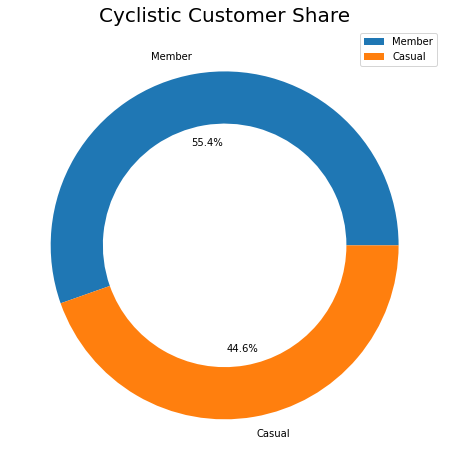

In [86]:
#Customer breakdown...
customers = cycDF['member_casual'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(customers.values, labels = ['Member','Casual'], autopct='%1.1f%%', wedgeprops=dict(width=.3))
plt.title('Cyclistic Customer Share', fontsize=20)
plt.legend();#['Member', 'Casual'], loc='center', title='Customer Type');


Member riders make up more than half (55.4%) of Cyclistic's customer base and represent committed cyclists who have a need to consistently access transportation. 

Casual riders make up 44.6% of Cyclistic's customer base and represent cyclists who are familiar with the service and have found some value in using the service over another form of transportation such as taxis, rideshares, etc. 

To help identify ways to convert Casuals into Members, I will explore the typical uses of the service in the following sections. 

<h3>4.b. Bike Type Preference by Member/Casual</h3>

Cyclistic offers two types of biking options: 

1. <ins>Classic Bike</ins>: Traditional bike which user pedaling produces forward propulsion. 
2. <ins>Electric Bike</ins>: A pedal-assisted bike with an electric motor. 

Identifying which bikes each customer group prefers will provide valueable insight into their typical use cases. To do that, I will first aggregate individual bike type usage per group and then visualize the results in a comparative pie plot:   

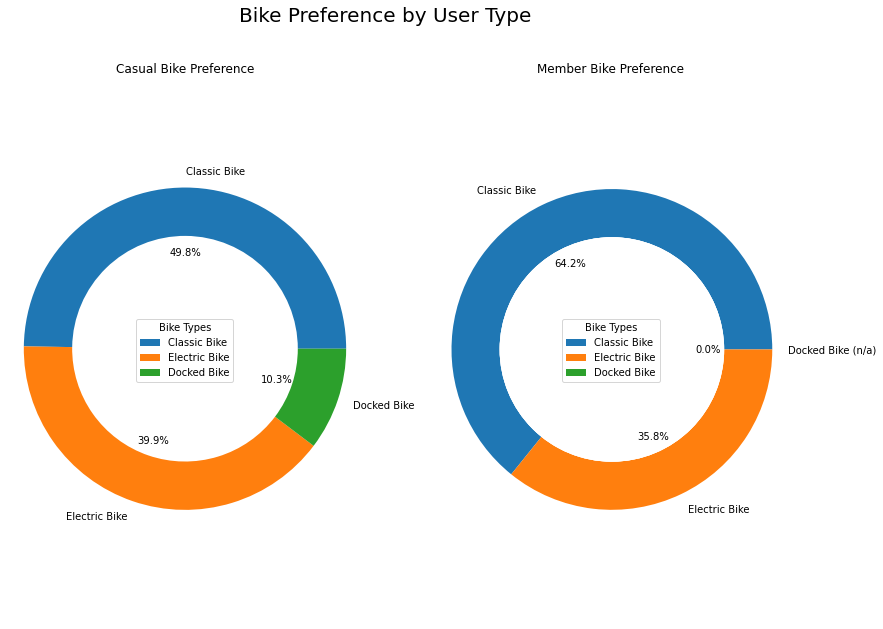

In [87]:
#Creating figure background and pieplot column alignment...
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,10)) #Two pie charts
circle = plt.Circle((0,0),0.70,fc='white')
fig1 = plt.gcf()
fig.suptitle('Bike Preference by User Type', fontsize=20) # H1 title

#Pie 1
casualBikePref = casualDF.rideable_type.value_counts()
ax1.pie(casualBikePref.values, labels = ['Classic Bike', 'Electric Bike', 'Docked Bike'], autopct='%1.1f%%', wedgeprops=dict(width=.3))
ax1.legend(['Classic Bike', 'Electric Bike', 'Docked Bike'], loc='center', title='Bike Types')
fig.gca().add_artist(circle)
ax1.axis('equal')
ax1.title.set_text('Casual Bike Preference')

#Pie 2
memberBikePref = memberDF.rideable_type.value_counts()
ax2.pie(memberBikePref.values, labels = ['Classic Bike', 'Electric Bike', 'Docked Bike (n/a)'], autopct='%1.1f%%',wedgeprops=dict(width=.3))
ax2.legend(['Classic Bike', 'Electric Bike', 'Docked Bike'], loc='center', title='Bike Types');
fig.gca().add_artist(circle)
ax2.axis('equal')
ax2.title.set_text('Member Bike Preference');

The data shows that Casual and Member riders prefer the 'Classic' bike over the 'Electric', with Members being almost twice as likely to choose a classic bike. This may be for a number of reasons to include differences in pricing, availability, and useage applicability. 

Pricing for Cyclistic's bikes is based on a pay-per-minute structure. Users can unlock a bike for a fee, ride for as many miles as they want within a certain time limit, and then pay for every minute after the time limit ends. 

<b>Members.</b> Annual members can unlock bikes for free and receive the first 45-minutes of ride time at no cost. If they ride longer than that, they are charged an additional \\$0.16/minute. This applies to both classic and e-bikes. 

<b>Casuals.</b> Casual riders can unlock a bike a dollar and pay \\$0.16/min/classic  (or \\$0.39/min/e-bike on a single-pass). They can also purchase a day-pass for $15.00 and receive 3-hour unlimited rides for 24-hours. The day-pass doesn't apply to e-bikes. 

<b>Note:</b> The [FAQ](https://help.divvybikes.com/hc/en-us/articles/360033124372-What-is-a-station-A-dock-A-kiosk-) defines docked bikes as '...bicycles [that] are locked into docs and must be unlocked using the app or ride code."

For Members, the potential hassle of locating an e-bike that is fully charged may not be worth it. Additionally, the number of e-bikes may be scarce or require locating a docking station to ensure a fully charged bike. If commute time or distance is of high priority to Members, then this may explain why they don't use docked bikes or largely prefer classic bikes. 

For Casuals, the small preference between e-bikes and classic bikes may be due to the times of year the bikes are used. While classic bikes appear to offer higher accessibility, e-bikes may surge in use during holidays/special events in which tourism increases. I will explore that conclusion by looking into bike type usage by Casuals during the year. 

First, I'll sort the months in calendar-order: 

In [93]:
#Import CategoricalDtype to sort list of strings...
#from pandas.api.types import CategoricalDtype
casualDF.month = casualDF.month.astype(CategoricalDtype(categories=monCats, ordered=True))

Next I'll visualize Casual rider preference by bike type over the course of a year

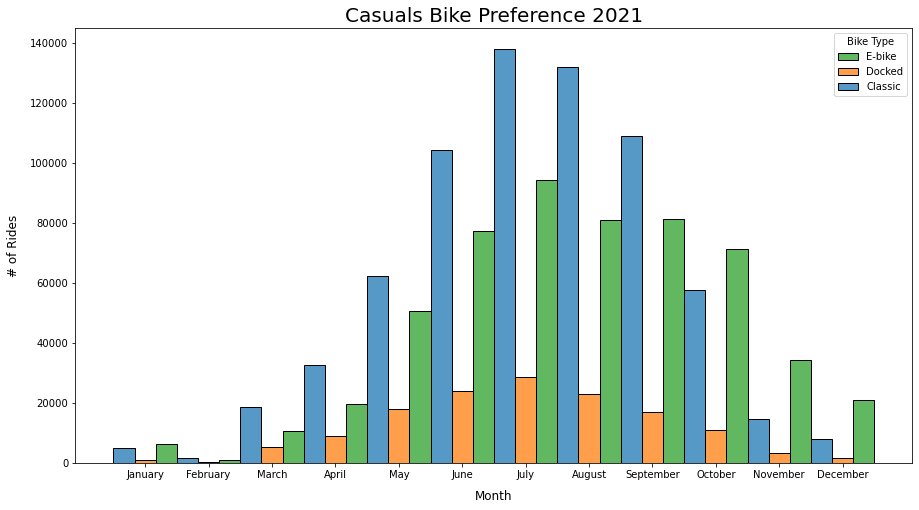

In [101]:
#Plotting Casual bike usage...
plt.figure(figsize=(15,8))
sns.histplot(data=casualDF, x='month',hue='rideable_type', multiple='dodge', binwidth=1)
plt.title('Casuals Bike Preference 2021', fontsize=20)
plt.xlabel('Month', fontsize=12, labelpad=10)
plt.ylabel('# of Rides', fontsize=12, labelpad=10)
plt.legend(['E-bike', 'Docked', 'Classic'], title='Bike Type');

From the graph, I see that classic bikes are highly preferred during the warmer months, but decline significantly starting in October. 

I'll plot a heatmap to see if I can grab some quick insights about Casual bike usage during the year:

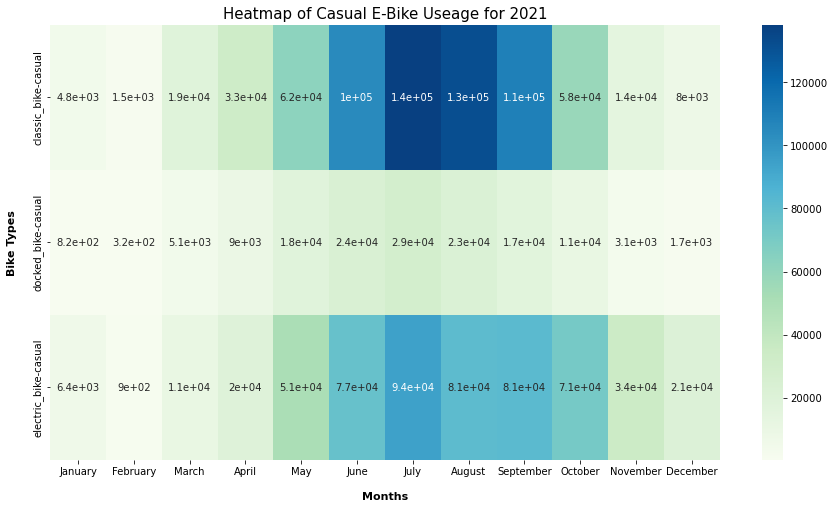

In [100]:
#Plotting heatmap of bike usage by Casual Members
plt.figure(figsize=(15,8))
sns.heatmap(pd.crosstab([casualDF.rideable_type,casualDF.member_casual], 
            cycDF.month, rownames=['Bike Type', 'Member/Casual']),
            cmap='GnBu', annot=True, cbar=True)
plt.title('Heatmap of Casual E-Bike Useage for 2021', fontsize=15)
plt.ylabel('Bike Types', fontsize=11, labelpad=15, fontweight='bold')
plt.xlabel('Months', fontsize=11, labelpad=15, fontweight='bold');

It does appear that Casuals useage of e-bikes surge at the beginning of May (Summer) and reduces significantly in November (Winter). Why that happens may be answered with a look into where e-bike customers start their ride. I suspect that tourist locations will see the most e-bike useage.

<h3>4.c. Trip Duration by Membership Level</h3>

Earlier I hypothesized that Member riders might prefer Classic Bikes over E-bikes due to time and distance constraints. More specifically, I believed that Members were more 'commuter' focused and simply used their bikes for that purpose. In this section, I'll test that hypothesis by exploring trip durations by group. 

I'll start by first discovering how much time, on average, each customer group spends on their bikes:

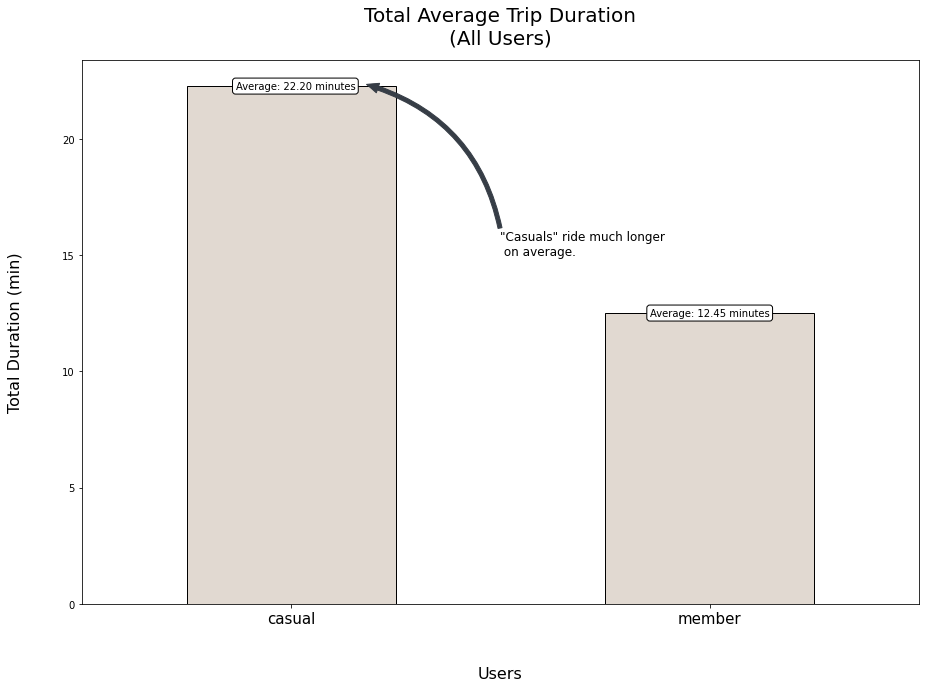

In [102]:
#Plotting comparison...
plt.figure(figsize=(15,10))
cycDF.groupby(['member_casual'])['bike_time_min'].mean()\
.sort_values(ascending=False).head(5)\
.plot(kind='bar', color='#E1D9D1', edgecolor='k', rot=0)
plt.title('Total Average Trip Duration\n(All Users)', y=1.02, fontsize=20)
plt.xlabel('Users', labelpad=40, fontsize=16)
plt.ylabel('Total Duration (min)', labelpad=40, fontsize=16)
plt.xticks(rotation=0, fontsize=15)
plt.annotate('Average: 22.20 minutes', xy=(.01,casualDF.bike_time_min.mean()),xycoords='data',ha='center',va='center',
            bbox=dict(boxstyle='round',fc='w'))
plt.annotate('Average: 12.45 minutes', xy=(1,memberDF.bike_time_min.mean()),xycoords='data',ha='center',va='center',
            bbox=dict(boxstyle='round',fc='w'))
plt.annotate('"Casuals" ride much longer\n on average.',
            xy=(0.18,22.34),
            xytext=(.5,15), textcoords='data',
            arrowprops=dict(headwidth=10, width=4, color='#363d46', 
                           connectionstyle='arc3,rad=0.3'),
            fontsize=12);

Casual riders clearly spend more time on their bikes on average. This makes me curious because Casual riders who don't purchase a day pass pay more per minute than day pass holders and Members. I'll explore the average time Casual riders spend on their bike during the year to see if there exists a trend. 

Another notable finding is that Membersspend less time on their bikes on average despite having upwards of 45 minutes of free riding time per session. In fact Members only spend 26% of their alloted 45 minutes per bike ride. This leads me to support my earlier hypothesis that Member riders are largely locals and commuters.

I'll view the different ride time averages in a box plot to see if any trends pop out at me:

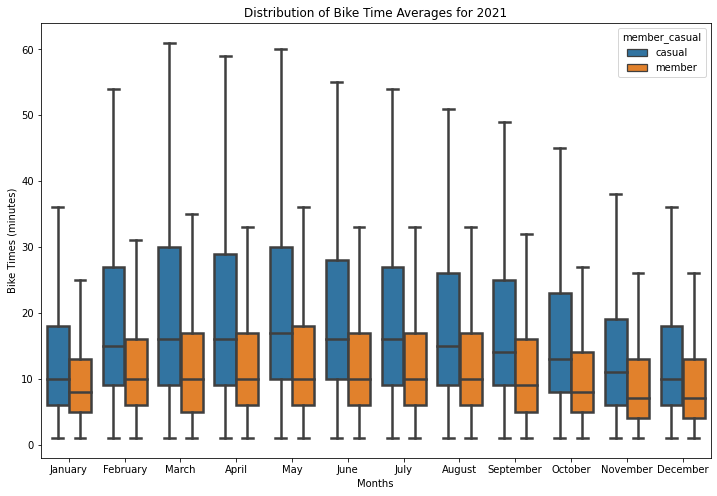

In [104]:
#Boxplot...
plt.figure(figsize=(12,8))
sns.boxplot(x='month', y='bike_time_min', data=cycDF, 
            hue='member_casual', linewidth=2.5, showfliers=False);
plt.title('Distribution of Bike Time Averages for 2021')
plt.xlabel('Months', fontsize=10)
plt.ylabel('Bike Times (minutes)', fontsize=10);

The graph shows that Casuals undoubtedly ride their bikes longer than Members on average. However, I'd like to drill down into the data to find out exactly when Casual riders are prone to traveling longer:

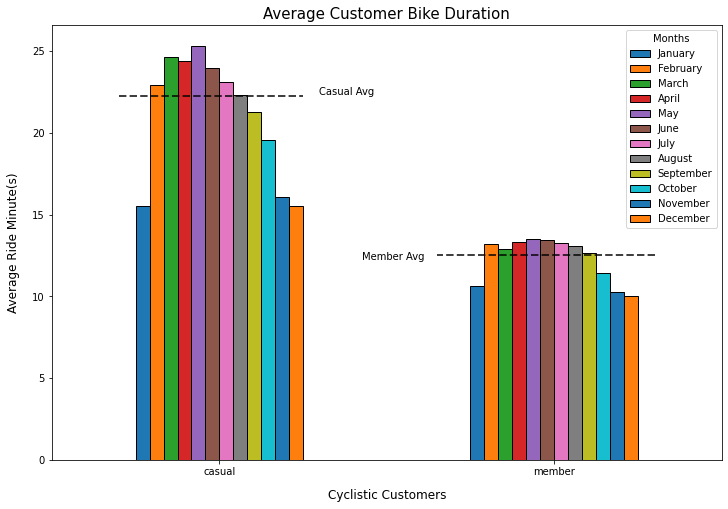

In [110]:
plt.rcParams['figure.figsize'] = (12,8)
pd.crosstab([cycDF.member_casual], 
            [cycDF.month],
            values = cycDF.bike_time_min,
            aggfunc = 'mean'
            )\
.plot(kind='bar', rot=0, edgecolor='k')

plt.title('Average Customer Bike Duration', fontsize=15)
plt.ylabel('Average Ride Minute(s)', labelpad=12, fontsize=12)
plt.xlabel('Cyclistic Customers', labelpad=12, fontsize=12)
plt.legend(title='Months')
plt.hlines(casualDF.bike_time_min.mean(),-.3,.25,colors='k',linestyles='--',lw=2,alpha=0.75)
plt.text(0.38, 22.50, 'Casual Avg', ha='center', va='center')
plt.hlines(memberDF.bike_time_min.mean(),1.3,.65,colors='k',linestyles='--',lw=2,alpha=0.75)
plt.text(0.52, 12.45, 'Member Avg', ha='center', va='center');

Here I discover that that casual riders take trips twice as long as casual members year-round. At this point I would love to dig deeper and figure out if this data is related to the pricing plans available to Casual riders. 

- Do Casual riders purchase day passes more often than single passes and subsequently ride longer?
- Are Casual riders spending more time on bikes to maximize their perceived value return? 
- Are Casual riders typically more leisurely in their bike usage or do they get lost more frequently?

Unfortunately, the generalized nature of the data does not offer enough data points to explore these questions further.

Moving on, I'll explore the data to see where riders are starting and ending their journeys to understand how the bikes are being used. For now, I believe that Members use their bikes to commute to/from work while Casuals largely represent tourists. 

I'll create a value comparison table using the IPython table display library to start with: 

In [112]:
#Import single-cell table displayer...
from IPython.display import display

Next I'll create some table styles...

In [113]:
#Establishing caption style
styles =\
[dict(selector='caption', props=\
      [('text-align', 'center'), ('font-size', '150%'), ('font-weight', 'bold')])]

Then I'll visual a table with the average ride lengths per weekday for the year: 

In [114]:
#Creating Casual table frames for display
pd1 = pd.crosstab([casualDF.weekday], 
            casualDF.month, values=casualDF.hour, 
            aggfunc='mean', margins=True)\
.reset_index().style.set_caption('Casual Rider Avg Trip Duration').set_table_styles(styles)\
.hide_index().format({'All': '{:20,.2f}'}).background_gradient(cmap='Blues')

#Sorting the weekday values for Members: 
memberDF.weekday = memberDF.weekday.astype(CategoricalDtype(categories=wkdyCats, ordered=True))

#Creating Member Table for display
pd2 = pd.crosstab([memberDF.weekday], 
            memberDF.month, values=memberDF.hour, 
            aggfunc='mean', margins=True)\
.reset_index().style.set_caption('Member Rider Avg Trip Duration').set_table_styles(styles)\
.hide_index().format({'All': '{:20,.2f}'}).background_gradient(cmap='Oranges')

#Displaying both tables
display(pd1)
display(pd2);

C:\Users\Work\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


weekday,January,February,March,April,May,June,July,August,September,October,November,December,All
Friday,14.139733,15.123188,14.774242,15.463394,15.346923,15.775089,15.273634,15.011152,14.791302,14.812242,14.449195,13.920613,15.12
Monday,14.130349,13.855263,14.989476,15.557582,14.551875,14.946818,14.490139,14.743405,14.156092,13.937605,14.243280,14.351809,14.55
Saturday,13.010903,14.396406,14.570451,14.362512,14.524601,14.160465,14.015840,14.172372,14.229803,13.801090,14.229071,13.536877,14.14
Sunday,13.320967,13.238889,13.468782,13.420350,13.519802,13.118276,13.704471,13.324182,13.508489,12.503697,12.773722,12.597531,13.29
Thursday,14.154275,14.476190,14.458176,15.448399,15.323064,15.669481,15.560864,15.442825,15.411322,14.909582,14.309779,14.659506,15.35
Tuesday,14.783613,14.045833,14.636619,15.619657,14.806368,15.603432,15.439221,14.791371,14.799097,14.862825,14.381846,13.980510,15.07
Wednesday,14.103862,14.608974,14.542627,14.879631,15.853121,15.667013,15.385660,15.198274,15.120874,14.749442,14.368800,14.463723,15.21
All,13.851029,14.324435,14.423335,14.857840,14.605485,14.828854,14.719143,14.500814,14.494778,14.014828,14.076557,13.977395,14.53


weekday,April,August,December,February,January,July,June,March,May,November,October,September,All
Monday,14.438639,14.126192,13.687057,13.605846,13.575355,14.258468,14.387164,13.844854,14.222554,13.715207,13.942139,14.075955,14.08
Tuesday,14.357938,13.907187,13.391379,13.977175,13.735086,14.530022,14.586692,13.774749,13.907035,13.748429,14.163113,14.096119,14.11
Wednesday,13.912589,14.284772,13.696758,13.629572,13.695203,14.440910,14.532817,13.644603,14.693489,13.677250,13.993494,14.225216,14.18
Thursday,14.372582,14.382722,13.767440,13.144181,13.676162,14.586692,14.431496,13.766764,14.361332,13.868137,14.136031,14.338869,14.26
Friday,14.383234,14.259914,13.223132,13.586169,13.539326,14.354632,14.873918,13.854880,14.188934,13.756480,14.007621,14.031331,14.16
Saturday,13.902073,13.760164,13.601264,13.737246,13.367618,13.567990,13.688899,13.904312,13.889036,13.902961,13.743087,13.853459,13.75
Sunday,13.493930,13.498909,13.105333,13.486586,13.637725,13.751889,13.462501,13.574240,13.653220,13.147578,12.988118,13.645923,13.47
All,14.150582,14.027291,13.532450,13.599082,13.604591,14.232089,14.314254,13.769405,14.122821,13.701100,13.862790,14.068405,14.02


<h3>4.d. Top Starting Locations For All Riders</h3>

In this section I plan to review the heaviest/popular locations that Members and Casuals use to start/end their journeys. 

There are approximately 840 unique locations listing in the data. It would be worthwhile to highlight the stations that all riders frequently visit as a potential marketing hub. Additionally, by identifying the most popular routes, we can better gauge typical uses by rider groups - even without granular data to fully support it. 

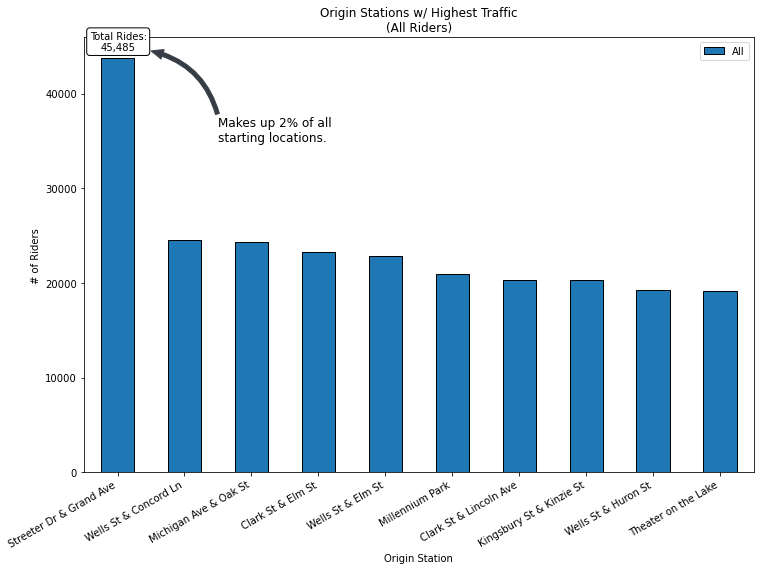

In [120]:
#Plotting highest origin station....
plt.figure(figsize=(12,8))
cycDF.groupby(['start_station_name'])['member_casual']\
    .count().sort_values(ascending=False).head(10)\
    .plot.bar(edgecolor='k')
plt.title('Origin Stations w/ Highest Traffic\n(All Riders)')
plt.xlabel('Origin Station')
plt.ylabel('# of Riders')
plt.legend(['All'])
plt.xticks(rotation=30, horizontalalignment='right');

plt.annotate('Makes up 2% of all\nstarting locations.',
            xy=(0.5,44500),
            xytext=(1.5,35000), textcoords='data',
            arrowprops=dict(headwidth=10, width=4, color='#363d46', 
                           connectionstyle='arc3,rad=0.3'),
            fontsize=12);
plt.annotate('Total Rides:\n45,485', xy=(.01,45487),xycoords ='data',ha='center',va='center',
            bbox=dict(boxstyle='round',fc='w') 
    
);

Streeter Dr & Grand Ave is single-handedly the highest traffic station in Chicago. However, a combination side streets with Wells St makes it one of the most popular routes that riders take. At this point, I'm not 100% sure if Casual rider influx makes both locations popular, so I'll dive a bit deeper to uncover the reason behind that.  

<h4>4.d.1. Top 5 Starting Locations for Members and Casuals</h4>

In this section I'll explore the top individual starting/end locations that have amassed the highest rider traffic during the year. 

The starting location data likely provides the greatest insight into rider behaviour as the geolocations allow me to infer some of the general participative activities at/around each location. For instance, it should show where the majority of each group's riders typically prefer to rent their bikes from.  

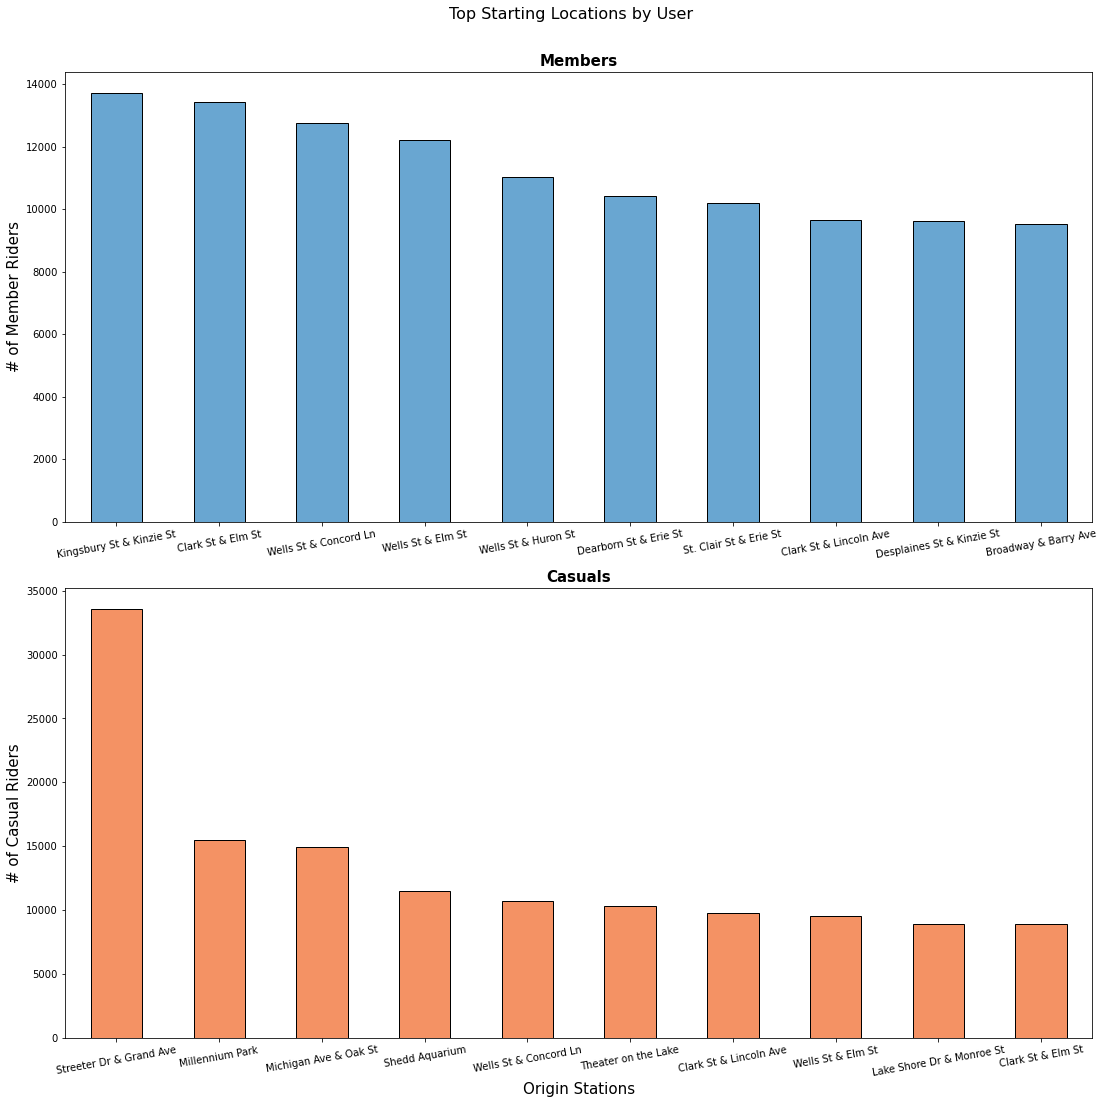

In [116]:
#Creating figure background...
fig, axes = plt.subplots(2, figsize=(15,15)) #Two charts
fig.tight_layout(h_pad=5)
fig.suptitle('Top Starting Locations by User', fontsize=16) # H1 title
plt.subplots_adjust(top=.92)

#Plotting MEMBER most popular starting location...
memberDF.groupby(['start_station_name'])['end_station_name'].count()\
.sort_values(ascending=False).head(10)\
.plot(kind='bar', ax=axes[0], color='#69a6d1', edgecolor='k')
axes[0].set_title('Members', fontsize=15, fontweight='bold')
axes[0].set_xlabel('')
axes[0].set_ylabel('# of Member Riders', fontsize=15)
axes[0].tick_params(axis='x', labelsize='medium', rotation=10)

#Plotting CASUAL most popular starting location...
casualDF.groupby(['start_station_name'])['end_station_name'].count()\
.sort_values(ascending=False).head(10)\
.plot(kind='bar', ax=axes[1], color='#f49264', edgecolor='k')
axes[1].set_title('Casuals', fontsize=15, fontweight='bold')
axes[1].set_xlabel('Origin Stations', fontsize=15)
axes[1].set_ylabel('# of Casual Riders', fontsize=15)
axes[1].tick_params(axis='x', labelsize='medium', rotation=10 );

- Streeter & Grand appear to be the top Casual starting location, followed by Milennium Park and Shedd Aquarium. 
    - The names suggest that they are city attractions but I'll need to confirm this with a geoplot.
- Members don't appear to start 

Next, I'll view the top destinations for each group of cyclists:

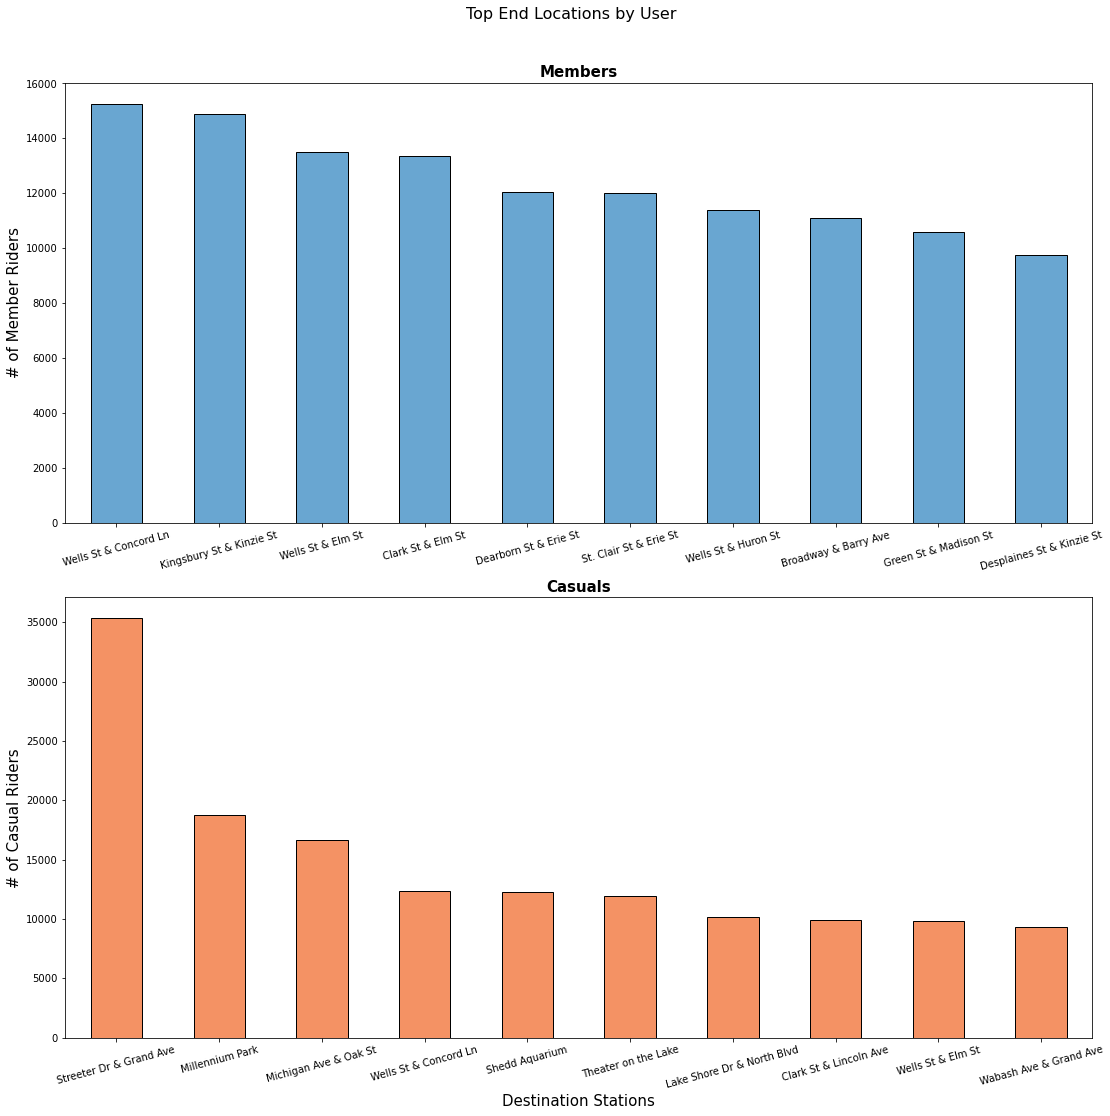

In [121]:
#Creating figure background...
fig, axes = plt.subplots(2, figsize=(15,15)) #Two charts
fig.tight_layout(h_pad=6)
fig.suptitle('Top End Locations by User', fontsize=16) # H1 title
plt.subplots_adjust(top=.91)

#Plotting MEMBER most popular starting location...
memberDF.groupby(['end_station_name'])['end_station_name'].count()\
.sort_values(ascending=False).head(10)\
.plot(kind='bar', ax=axes[0], color='#69a6d1', edgecolor='k')
axes[0].set_title('Members', fontsize=15, fontweight='bold')
axes[0].set_ylabel('# of Member Riders', fontsize=15)
axes[0].set_xlabel('')
axes[0].tick_params(axis='x', labelsize='medium', rotation=15)

#Plotting CASUAL most popular starting location...
casualDF.groupby(['end_station_name'])['end_station_name'].count()\
.sort_values(ascending=False).head(10)\
.plot(kind='bar', ax=axes[1], color='#f49264', edgecolor='k')
axes[1].set_title('Casuals', fontsize=15, fontweight='bold')
axes[1].set_xlabel('Destination Stations', fontsize=15)
axes[1].set_ylabel('# of Casual Riders', fontsize=15)
axes[1].tick_params(axis='x', labelsize='medium', rotation=15);


My observations: 

- Members and Casuals share 'Wells & Elm' and 'Wells & Concord' as common destinations.
    - 'Wells & Concord' were frequented about the same amount of times by both groups
    - 'Wells & Elm' were also frequented close the same amount of time.
- Casual riders visit 'Streeter Dr & Grand Ave' nearly twice as much as any other location. 
    - That section is close to the Navy Pier, Shakespeare Theater, a Museum, and a Bike Trail.

In [122]:
#Importing map plotting library Folium
import folium

Next I'll establish the geolocation and map position of Chicago, IL: 

In [123]:
#Create map object | Set LOI coords (lat & lon)
map0 = folium.Map(location=[ 41.87476, -87.7195], zoom_start=12, tiles='Stamen Toner')
map0.save('chiMap.html')

Finally, I'll create a list of coordinates made up of the top starting locations for both Casuals and Members. I'll then pass those coordinates into Folium's features group, create a legend, and plot those points on the previously created map. 

In [124]:
#Creating lAYER control
shapesLayerCasual = folium.FeatureGroup(name='circles').add_to(map0)


#Creating Circle Data array
circlesData_Casual = [
    [ 41.8922419, -87.6119493, 200, 'Casual: Streeter & Grand'],
    [ 41.884013, -87.620765, 200, 'Casual: Milennium Park'],
    [ 41.900793, -87.624232, 200, 'Casual: Michigan Ave & Oak St'],
    [ 41.866496, -87.613451, 200, 'Casual: Shedd Aquarium'],
    [ 41.912122, -87.634730, 300, 'Casual: Wells St & Concord Ln'],
    [ 41.926210, -87.630811, 200, 'Casual: Theater on the Lake'],
    [ 41.918346, -87.636057, 300, 'Casual: Clark & Lincoln'],
    [ 41.903209, -87.634465, 300, 'Casual: Wells & Elm'],
    [ 41.880953, -87.616826, 200, 'Casual: Lake Shore & Monroe'],
    [ 41.902902, -87.631363, 300, 'Casual: Clark & Elm']
]

circlesData_Member = [
    [ 41.889130, -87.638517, 200, 'Member: Kingsbury & Kinzie'],
    [ 41.902902, -87.631363, 200, 'Member: Clark & Elm'],
    [ 41.912131, -87.634725, 200, 'Member: Wells & Concord'],
    [ 41.903209, -87.634465, 200, 'Member: Wells & Elm'],
    [ 41.894048, -87.629329, 200, 'Member: Dearborn & Erie'], 
    [ 41.894800, -87.634368, 200, 'Member: Wells & Huron'],
    [ 41.894342, -87.622751, 200, 'Member: St.Clair & Erie'],
    [ 41.918346, -87.636057, 200, 'Member: Clark & Lincoln'],
    [ 41.888780, -87.644378, 200, 'Member: Desplaines & Kinzie'],
    [ 41.937644, -87.644113, 200, 'Member: Broadway & Barry']
]

#Creating function for layer control and circle plotting
#Circle markers for Casuals
for cData in circlesData_Casual: 
    folium.Circle(location=[ cData[0], cData[1]], radius = cData[2], popup = cData[3], weight = 5, 
                  color = 'crimson', fill = False).add_to(map0)
    
#Circle markers for Members    
for cData in circlesData_Member:
    folium.Circle(location=[ cData[0], cData[1]], radius = cData[2], popup = cData[3], 
                  weight = 5, color = 'green', fill = False).add_to(map0)
    
folium.LayerControl().add_to(map0)

#Creating legend
from branca.element import Template, MacroElement

#Creating Legend HTML code
#Sourced from ColinTalbert at: 
#(http://nbviewer.jupyter.org/gist/talbertc-usgs/18f8901fc98f109f2b71156cf3ac81cd)
template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Groups</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:0.7;'></span>Casuals</li>    
    <li><span style='background:green;opacity:0.7;'></span>Members</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

map0.get_root().add_child(macro)

#View map
map0

As the chart shows, the majority of Casual start/end station frequency lies near the bay area, a hotspot for tourist activity. 

Members appear to be located within the city (although still close to the bay area). 

Both groups tend to visit Wells & Concord pretty frequently, which make sense because Lincoln Park is located in that area with a bike trail. 

Since the scope of this analysis is to discover Casaul/Member uses of Cyclistic service (and to uncover ways to convert Casual riders into annual members) I believe this largely shows that Casual riders predominantly visit Chicago attractions. However, it might be worth exploring Casual ridership west of I-90 to see if there exists similar use cases between Casuals/Members in future exploration. 

<h3>4.e. Travel Frequency (day/week/month/) </h3>

Casual and Member travel frequency should highlight some useful useage pattern insights for our analysis. Some initial questions I plan to explore include: 

- Does weather affect bike riding time and frequency? 
- Are there specific dates/days/months where ridership spike/decline? 
- Do riders adjust their starting/ending destinations based on time of the year? 

I'm sure that some branching questions may arise, but the core of this section will be dedicated to answering the posed questions in a definitive way. 

<h4> 4.e.1. Riders by Hour</h4>

I think it might a good idea to establish a baseline of rider useage by hour to understand when riders are typically out and about during any given day. 

We can do this by calculating the average number of trips taken during days of the week for the entire year. Using this measure would allow us to account for variability in seasons. 

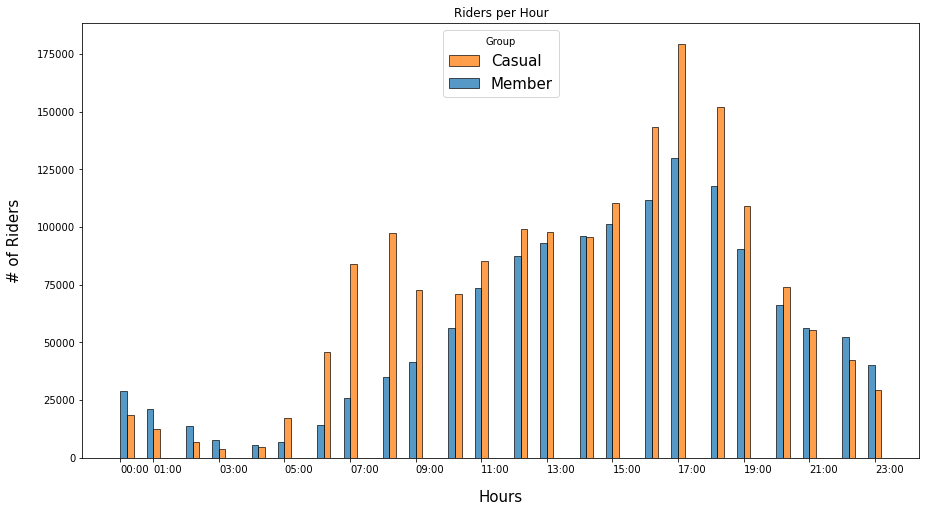

In [125]:
plt.figure(figsize=(15,8), edgecolor='k')
sns.histplot(data=cycDF, x='hour',hue='member_casual', multiple ='dodge', binwidth=.4, edgecolor='k')
plt.title('Riders per Hour')
plt.xlabel('Hours', fontsize=15, labelpad=15)
plt.ylabel('# of Riders', fontsize=15, labelpad=15)
plt.legend(['Casual','Member'], title='Group', loc='upper center', fontsize=15)
plt.xticks([0,1,3,5,7,
            9,11,13,15,
            17,19,21,23],
          ['00:00','01:00', '03:00','05:00','07:00',
           '09:00','11:00','13:00','15:00',
           '17:00','19:00','21:00','23:00'], ha='left');

- Most activity for Casuals happens between 8am - 8pm and peaks around 5pm. 
- Member usage occurs between 9am - 11pm and peaks around 5pm. 

<h4>4.e.2. Riders per Day</h4>

By checking the daily rider variability, I can eyeball the typical traffic seen within the year from both groups.

I will use a histplot for that purpose: 

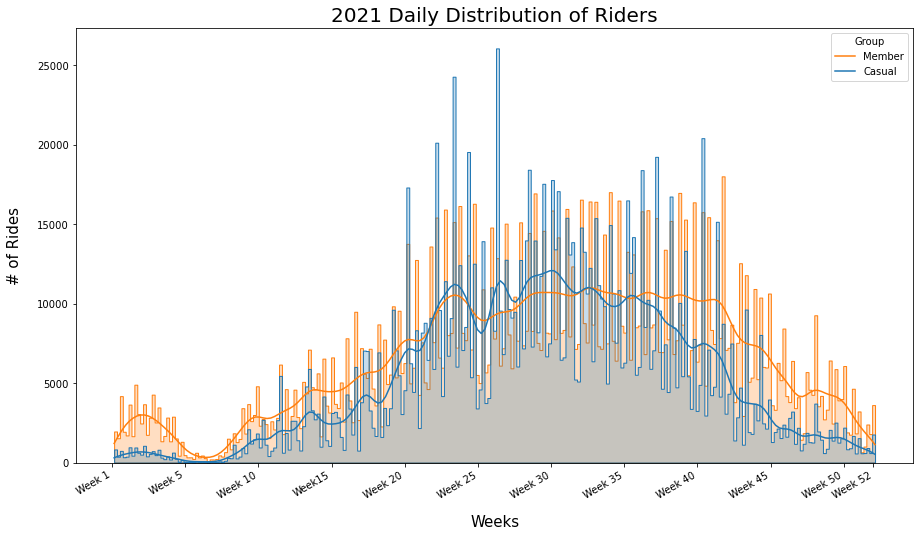

In [126]:
plt.figure(figsize=(15,8))
sns.histplot(data=cycDF, x='day365', hue='member_casual', element='step', kde=True)
plt.title('2021 Daily Distribution of Riders', fontsize=20)
plt.legend(['Member', 'Casual'], title='Group', fontsize=10)
plt.xlabel('Weeks', fontsize=15, labelpad=15)
plt.ylabel('# of Rides', fontsize=15, labelpad=15)
plt.xticks([0, 35,70,105,140,175,210,245,280,315,350,364], 
           ['Week 1','Week 5','Week 10','Week15','Week 20','Week 25',
            'Week 30','Week 35','Week 40','Week 45','Week 50','Week 52'], rotation=30, ha='right');

From the 'Daily Distribution of Riders' chart I can see that overall ridership is stable among members (as expected) and highly dynamic amongst casual members, especially between weeks 21 through 42. 

<h4>4.e.3. Riders per Week</h4>

Here I plan to aggregate the total trips taken by days of the week for 2021 to see if any patterns emerge for each rider group. 

I suspect that members will have more consistent useage during the week as I've hypothsized that they're likely commuters with almost daily need for short-form transportation. 

Casual riders on the other hand may have more variability in their useage as I've hypthosized that they may be predominantly tourists visiting Chicago attractions. 

I'll use a bar chart to visualize the comparisons: 

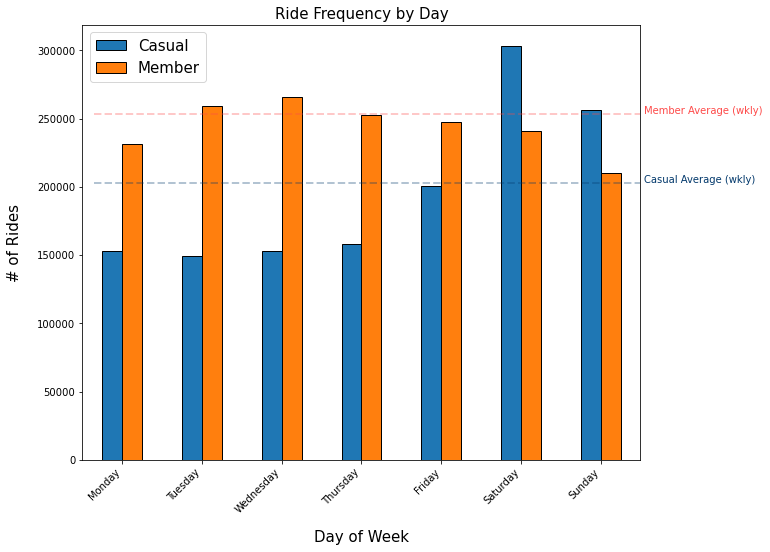

In [127]:
#Plotting Ride Frequency By User Type, By Day of the Week
plt.rcParams['figure.figsize'] = (10,8)
cycDF.weekday = cycDF.weekday.astype(CategoricalDtype(categories=wkdyCats, ordered=True))
cycDF.groupby(['weekday','member_casual']).size().unstack().plot.bar(edgecolor='k')

#Adding plot descriptions
plt.title('Ride Frequency by Day', fontsize=15)
plt.ylabel('# of Rides', fontsize=15, labelpad=15)
plt.xlabel('Day of Week', fontsize=15, labelpad=15)
plt.xticks(rotation=45, ha='right')
plt.legend(['Casual', 'Member'], loc='upper left', fontsize=15)

#Estimating averages using categorical midpoint
#Using horizontal lines...
plt.hlines(203050,-0.35,9,colors='#03396c',linestyles='--',lw=2,alpha=0.3) #CasualWkly
plt.text(6.55, 203050,'Casual Average (wkly)', color='#03396c')
plt.hlines(253273,-0.35,9,colors='#fe4a49',linestyles='--',lw=2,alpha=0.3) #MemberWkly
plt.text(6.55, 253273, 'Member Average (wkly)', color='#fe4a49');


The data shows that Members take more weekly trips on average than Casuals; however, Casuals notably take more trips on the weekends (Saturday & Sunday). 

<h4>4.e.4. Riders per Month</h4>

Reviewing ridership per month could help me identify seasonal trends that may influence Member/Casual trip frequency.  
     
I'll dive a little deeper in this section to see if any pops out. 

I'll start by visualizing the total number trips take by both groups per month:

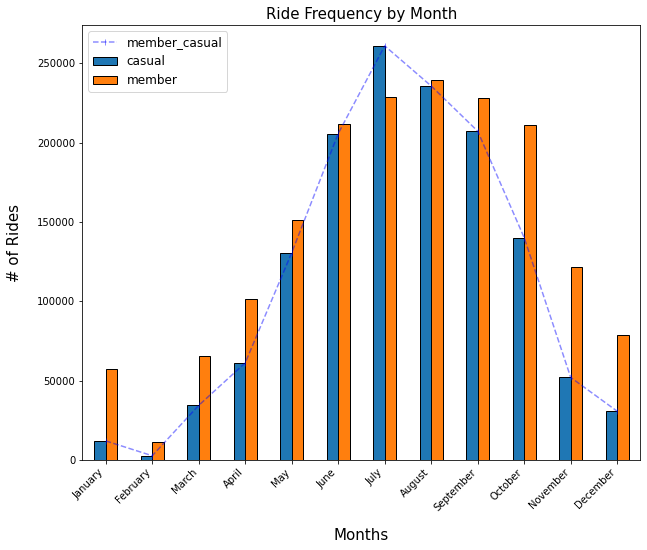

In [131]:
#Plotting Dodged Bar Chart...
plt.rcParams['figure.figsize'] = (10,8)

#Plotting with KDE lines
ax = casualDF.groupby(['month'])['member_casual'].count().plot(marker='|', color='b', ls='--', alpha=0.45)
cycDF.month = cycDF.month.astype(CategoricalDtype(categories=monCats, ordered=True))

#Plotting bars
cycDF.groupby(['month','member_casual']).size().unstack().plot.bar(edgecolor='k', ax=ax) 

#Graph description work...
plt.title('Ride Frequency by Month', fontsize=15)
plt.ylabel('# of Rides', fontsize=15, labelpad=15)
plt.xlabel('Months', fontsize=15, labelpad=15)
plt.legend(loc='upper left', fontsize=12)
plt.xticks(rotation=45, ha='right');

Casual ridership clearly peaks during the summer months. Additionally, Member ridership also sees a significant increase. This may indicate casual rider conversions or it could simply be Members enjoying the weather. More data will be needed to tell. Regardless, it might be intersting to compare the values behind the plot to see if anything else stands out.

I'll create a pseudo-title for each data frame and print the data frames for observation:

In [133]:
#Creating Casual table frames for display
pd1 = pd.crosstab([casualDF.weekday], 
            casualDF.month, values=casualDF.weekday, 
            aggfunc='count', margins=True)\
.reset_index().style.set_caption('# of Casual Rider Trips').set_table_styles(styles)\
.hide_index().format({'All': '{:20,.0f}'}).background_gradient(cmap='RdPu')

#Sorting the weekday values for Members: 
memberDF.weekday = memberDF.weekday.astype(CategoricalDtype(categories=wkdyCats, ordered=True))

#Creating Member Table for display
pd2 = pd.crosstab([memberDF.weekday], 
            memberDF.month, values=memberDF.weekday, 
            aggfunc='count', margins=True)\
.reset_index().style.set_caption('# of Member Rider Trips').set_table_styles(styles)\
.hide_index().format({'All': '{:20,.0f}'}).background_gradient(cmap='PuRd')

#Displaying both tables
display(pd1)
display(pd2);

C:\Users\Work\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


weekday,January,February,March,April,May,June,July,August,September,October,November,December,All
Friday,1646,414,3300,10695,15698,29465,43211,33537,28879,21549,6338,5681,"200,413"
Monday,1519,152,4751,7129,17388,19330,27837,28165,24178,11876,7255,3428,"153,008"
Saturday,2568,946,9063,12372,33372,42539,60922,48146,41975,36705,10010,4759,"303,377"
Sunday,1779,360,6935,10929,30729,37666,40551,48846,38522,28265,8273,3645,"256,500"
Thursday,1614,273,2379,5872,11815,23094,33953,26961,29235,12221,5420,5586,"158,423"
Tuesday,1428,240,4271,8913,9673,26689,26843,27048,18382,14733,7943,2822,"148,985"
Wednesday,1502,312,3730,5317,11969,26983,27755,23059,26118,14787,6814,4824,"153,170"
All,12056,2697,34429,61227,130644,205766,261072,235762,207289,140136,52053,30745,"1,373,876"


weekday,April,August,December,February,January,July,June,March,May,November,October,September,All
Monday,13934,36801,9874,1129,8659,27721,25989,10474,22745,21707,23539,28517,"231,089"
Tuesday,16000,39003,9860,1621,8482,31310,36399,10677,18394,24510,32456,30202,"258,914"
Wednesday,13019,31980,15209,1914,8317,32281,38471,10394,21872,18993,32738,40863,"266,051"
Thursday,14115,33429,15639,1727,8952,38775,29261,7203,19644,15099,26472,41910,"252,226"
Friday,18203,32480,12952,1822,8366,38767,28299,8269,19827,14467,33592,30704,"247,748"
Saturday,13602,31680,8542,1823,8060,35932,27332,10367,25603,14118,35222,28927,"241,208"
Sunday,12520,34377,6769,1081,6277,23820,26294,8385,22980,12983,27183,27076,"209,745"
All,101393,239750,78845,11117,57113,228606,212045,65769,151065,121877,211202,228199,"1,706,981"


A few observations from the data: 

1. Casual riders are less active in January, February, March, November, and December. 
2. Both rider groups combined took less than 15000 trips in February. 
3. Casual Riders are less active on Tuesdays while Member riders are significantly less active on Sunday's. 
4. Both groups saw an increased annual growth rate: 

    a. Casual ridership increased by 149% from January
        - Month-over-Month Growth Rate: <b>7.89%</b>
    b. Member ridership increased by 35% from January
        - Month-over-Month Growth Rate: <b>2.59%</b>
        
At this point, I belive that I've discovered enough about how Casual and Member riders use Cyclistic's bikes to offer some recommendations. 

<hr>
<h2>5. Analysis Summary</h2>

The primary purpose of this analysis was to determine how Casual and Member riders use Cyclistic bikes differently. Based on my analysis, it was discovered that Cyclistic bike useage can be characterized in three ways: 

1. Commuter vs Tourist
2. Purposeful Rides vs. Leisurely Rides
3. Weekday-ers vs Weekenders

<b><ins>1. Commuters vs. Tourists</ins></b><br>
Member riders tend to spend less time on their bikes comparative to Casual riders. This insight leads me to believe that Members of Cyclistic are predominantly commuters who live and or work around the start/end stations listed in the data set. 

Casual riders, on the other hand, appear to frequently start/end their rides around the Navy pier and along the bay area. 'Streeter Dr & Grand Ave' was nearly 2x more populated with casual riders than any other location in this analysis. This insight leads me to conclude that a large portion of Casual riders are tourists. 

<b><ins>2. Purposeful Rides vs. Leisurely Rides</ins></b><br>
As previously highlighted, Casual riders spent twice as much time on their bikes as Member riders. This could be due to a number of factors such as location congestion, traffic, being lost, or simply enjoying a <ins>leisurely</ins> bike ride. Without data with details about casual rider pass-type, it will be almost impossible to draw a definitive conclusion. 

Member riders, however, spent no longer than 15 minutes on average with their bikes. The membership perks allow Members to spend up to 45-minutes for each ride without additional charge. Seeing that Member riders were leaving on average 30 minutes of riding time per session leads me to conclude that they were utilizing their bikes with a purpose and may be <ins>commuters/couriers</ins>. 


<b><ins>3. Weekday-ers vs. Weekenders</ins></b><br>
Member riders consistently ride their bikes throughout the entire week. They average approximately 250K+ trips M-F and average a little less on the weekends.

Casual riders are highly active on weekends. In fact, Casual riders took a total of 111K more trips on Saturdays and Sundays than Member riders. 

<h2>6. Conclusion, Recommendations, Further Exploration</h2>

<b><ins>Conclusion</ins></b><br>
It will be challenging to develop a Casual conversion strategy based solely on the findings in this analysis. While general use cases have been identified, more data will be needed to make accurate determinations about Casual member's likelihood of conversion and potential touchpoints during the conversion journey. 

Member and Casual riders have seemingly divergent uses for Cyclistics bikes. Members consistently use their bikes throughout the week, spend less time on their bikes, and travel shorter distances when compared to Casual riders. Conversely, Casual riders tend to increase ridership during warmer months of the year and spend more time in radiuses closer to Chicago's tourist attractions. 

Data involving demographics, behavioral, and pyschographics would help paint a better picture of where Member/Casual riders are in the sales, customer acquisition, brand loyalty, and retention cycles. 

While Casual riders are aware of Cyclistic, we are not sure whether they use the bikes due to brand sentiment (loyalty, enjoyment, etc.), lack of other affordable travel options, or something else. Social media surveys, probative and qualitative data collection, and on-going sentiment analysis would allow for stronger reasons to pursue Casual rider conversion. 

Given the data, there is little reason for Casual riders to convert to an annual membership. The \\$15 day-pass offers everything a tourist would need to make the most out of a day of sight-seeing. Even if they spent an entire weekend visiting Chicago attractions, the value of 3-hour rides for 24-hours perfectly matches the anticpated/desired utility. 

<b><ins>Recommendations</ins></b><br> 
As previously mentioned, recommending strategies to convert Casual riders to annual members is challenging due to lack of visibility into more relevant data points. However, I can make recommendations solely based on the presented data and suggest that cross-functional collaboration with the marketing department take place prior to any implementation. 

Here are my 3 recommendations: 

1. <b>Create an actual 'Casual' membership tier with monthly/annual subscription.</b><br>
The data suggests that annual members ride Cyclistic bikes on a daily basis and have an obvious need to maximize utility and cost savings. Casual memebers, however, have an obvious need for convenience, leisure, and utility. While it wasn't clear which pass-type was used the most by Casual riders (single- or day-pass), it may be worth exploring a 'Casual membership' that caters to those needs.

There may exist a segment of Casual riders that use their bikes similarly to Members; however, the data doesn't warrant full exploration of that hypothesis but it's worth mentioning as a potential targeting strategy - I.E. all Casual riders located due west of [I-90](https://data.cityofchicago.org/Transportation/Divvy-Bicycle-Stations-All-Map/bk89-9dk7). 

2. <b>Offer Monthly Biking Challenges</b><br>
A Cyclistic bike acts much like a moving billboard. By creating monthly biking challenges, the company can incentivize Casual members to join the hype. Prizes, shoutouts, and additional membership points for completing the challenges will likely improve member loyalty and establish an 'exclusivity'-esque aura around memberships. 


3. <b>Improve Annual Membership Perks</b><br>
Annual members currently enjoy unlimited 45-minute rides per ride, \\$0 unlocks, and  \\$0.16/min overages. However, they see a significant decline in ridership during the Weekends. By adding monthy 'guest passes' to the membership tier, Member riders may ride more during the weekends AND convert non-members in the process (friends, co-workers, neighbors, etc.)


<b><ins>Further Exploration</ins></b>

- Conversion rate data
    - I.E. If Casual riders converted to Member riders during the year
- Dimenished potential of bike trip duration
    - Analyzing Paths taken (optimized routing)
    - Analyzing casual rider pass-type vs. time on bikes
- Charge/Battery duration and its affect on ridership
    -Are depleted e-bikes chosen significantly less than fully charged counterparts? 
- Pricing Group Data / Income Data
- Membership Start Dates and Tenure
- Predictive analysis on Churn rates for members
- Theft reports/Bike Loss/Accidents cross-referenced with geographical ridership data


<h2>7. Saving The Analyzed Data Set</h2>

In [134]:
#Saving the data to csv file. 
cycDF.to_csv(
    'C:\\Users\\Work\\Documents\\A_Jupyter_Projects\Projects\\A_Cyclistic_Analysis\\CreatedDFs\\versions\\cyclisticDF_2022.csv',
    index = False)

<hr>